# **Health Insurance Cross-Sell Lead: Exploring Binary Classification of Customer Profiles**

## **Problem Description**

Your client is a financial services company offering various products like loans, investments, and insurance. They want to recommend health insurance to existing customers visiting their website based on their profiles, aiming to reduce churn and enhance scalability.

**Supervised Machine Learning Problem Type:** Binary Classification

## **Dataset**
Here is information regarding the potential-customer and the insurance at any given point in time:

1. Demographics (city, age, region etc.)
2. Information regarding holding policies of the customer
3. Recommended Policy Information

## **Target**
Our target is to build a model to predict whether the person will be interested in their proposed health plan/policy given the information above.

**Grading Metric:** ROC_AUC_SCORE

**Import Packages**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
data_dir = '/content/drive/My Drive/Colab Notebooks/My Github Repository/health-insurance-churn-all'
os.chdir(data_dir)

**Upload Training, Testing, and Sample Submission CSV Datasets**

In [8]:
train_file_path = os.path.join(data_dir, 'train.csv')
test_file_path = os.path.join(data_dir, 'test.csv')
sample_sub_file_path = os.path.join(data_dir, 'sample_submission.csv')

print(f'Train file: {train_file_path}')
print(f'Train file: {test_file_path}')
print(f'Train file: {sample_sub_file_path}')

Train file: /content/drive/My Drive/Colab Notebooks/My Github Repository/health-insurance-churn-all/train.csv
Train file: /content/drive/My Drive/Colab Notebooks/My Github Repository/health-insurance-churn-all/test.csv
Train file: /content/drive/My Drive/Colab Notebooks/My Github Repository/health-insurance-churn-all/sample_submission.csv


**Random Seed:** Is a parameter that makes sure that anyone who re-runs your code will get the exact same outputs.

In [9]:
RANDOM_SEED = 42

In [10]:
def seed_everything(seed=RANDOM_SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything()

## **EDA**



Lets run and look into the datasets first

In [11]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
sub_df = pd.read_csv(sample_sub_file_path)

In [12]:
train_df.sample(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
19808,19809,C4,3283,Rented,Individual,25,25,No,X2,NaN,NaN,14,7068.0,0
17700,17701,C4,1308,Rented,Individual,23,23,No,X1,NaN,NaN,22,4080.0,0
24039,24040,C2,168,Rented,Joint,26,24,Yes,X2,1.0,3.0,13,16486.4,0
23029,23030,C2,256,Rented,Individual,54,54,No,X4,11.0,1.0,22,19214.0,1
44332,44333,C7,4006,Owned,Individual,75,75,No,X3,3.0,3.0,21,20376.0,0
22557,22558,C9,1863,Owned,Individual,67,67,No,X2,2.0,4.0,4,19584.0,0
2541,2542,C3,3706,Owned,Individual,51,51,No,X2,10.0,3.0,21,12820.0,0
43789,43790,C9,1376,Rented,Individual,74,74,No,X6,NaN,NaN,20,23358.0,0
14224,14225,C9,2172,Rented,Individual,53,53,No,X1,14+,2.0,6,11178.0,0
9531,9532,C3,258,Rented,Individual,25,25,No,NaN,NaN,NaN,21,11358.0,1


After loading the data, let's first check all the variable names and their variable types.

In [13]:
train_df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

Check the variable types using the info function of pandas dataframe.

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

## **Data Cleaning**

Let's check to see which variables or categories have missing values.

In [15]:
nulls_train = np.sum(train_df.isnull())
nulls_train

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

`Health Indicator`, `Holding_Policy_Duration`, and `Holding_Policy_Type` features have large amounts of missing values in this training dataset. Let's compare them to each other.

To do this, we can illustrate the number of null values for each column in a bar chart, counting nulls that are contained in all three features.

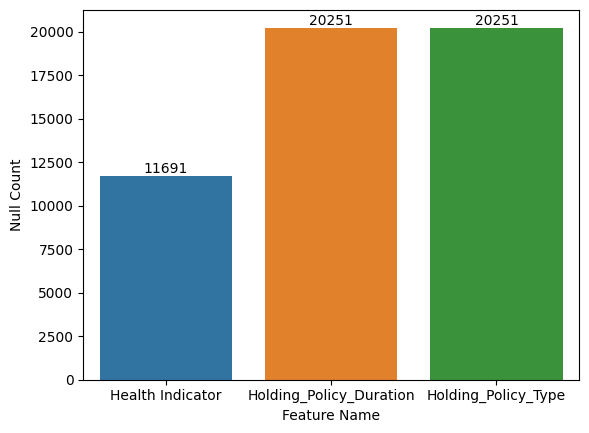

There are 3 features with missing values in the training data.
Columns containing nulls are: ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']


In [16]:
nulls_train = np.sum(train_df.isnull())
nulls_train_cols = nulls_train.loc[(nulls_train != 0)]

# ax = plt.subplots(figsize=barplot_dim)
ax = sns.barplot(x=nulls_train_cols.index, y=nulls_train_cols)
plt.ylabel("Null Count");
plt.xlabel("Feature Name");

# Add count values at the top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
print('There are', len(nulls_train_cols), 'features with missing values in the training data.')
print(f'Columns containing nulls are: {list(nulls_train_cols.index)}')

`Holding_Policy_Duration` and `Holding_Policy_Type` features both have 20,251 missing values, which can be inferred as values pertaining to non-existing customers. `Health Indicator` feature only has 11,691 missing values which likely originated from an empirical calculation, such as BMI.

Let's see the trend in missing values in the testing dataset.

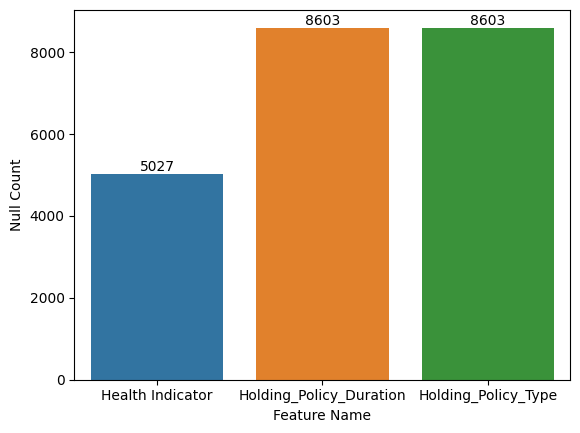

There are 3 features with missing values in the training data.
Columns containing nulls are: ['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']


In [17]:
nulls_test = np.sum(test_df.isnull())
nulls_test_cols = nulls_test.loc[(nulls_test != 0)]

# ax = plt.subplots(figsize=barplot_dim)
ax = sns.barplot(x=nulls_test_cols.index, y=nulls_test_cols)
plt.ylabel("Null Count");
plt.xlabel("Feature Name");

# Add count values at the top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
print('There are', len(nulls_test_cols), 'features with missing values in the training data.')
print(f'Columns containing nulls are: {list(nulls_test_cols.index)}')

Similar to the training set, we can see that `Holding_Policy_Duration` and `Holding_Policy_Type` features are the same amount at 8,063 missing values, while `Health Indicator` feature has 5,027 missing values.

In order to clean `Holding_Policy_Duration` and `Holding_Policy_Type`, we need to assign '0' to fill the null values.


In [18]:
train_df['Holding_Policy_Duration'].fillna(0, inplace=True)
test_df['Holding_Policy_Duration'].fillna(0, inplace=True)

In [19]:
train_df['Holding_Policy_Type'].fillna(0, inplace=True)
test_df['Holding_Policy_Type'].fillna(0, inplace=True)

`Health_Indicator` values are derived from pre-existing metric based on empirical calculations like BMI. This variable can be cleaned by assigning the missing values with mode.

In [20]:
train_df['Health Indicator'].fillna(train_df['Health Indicator'].mode()[0], inplace=True)
test_df['Health Indicator'].fillna(test_df['Health Indicator'].mode()[0], inplace=True)

Let's check once more if there is any more missing values in our training and testing set.

In [21]:
np.sum(train_df.isnull())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [22]:
np.sum(test_df.isnull())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

Let's confirm if there is class imbalance issues for our model prediction. We can do this by using the `Response` feature.

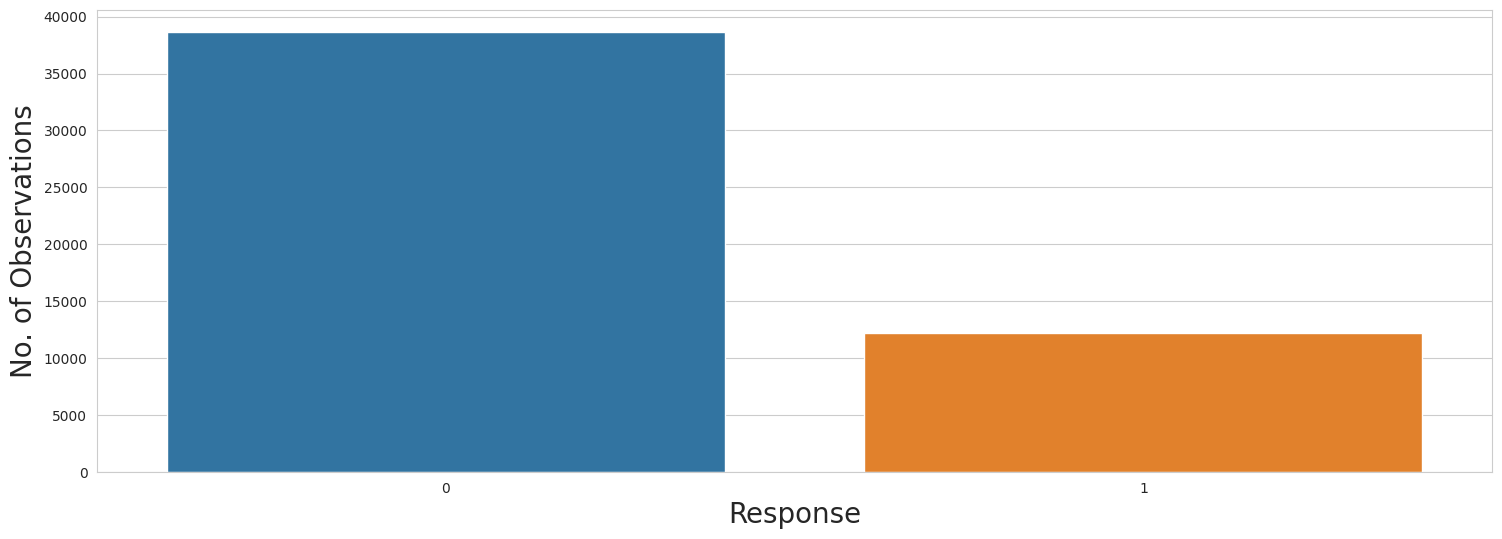

In [23]:
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
sns.countplot(x='Response', data=train_df)
plt.xlabel("Response", size=20)
plt.ylabel("No. of Observations", size=20)
plt.show()

A large number of `0` responses means an imbalanced set. We have to keep that in mind while modelling and choosing hyper-parameters later.

 Let's display the number of unique values in each feature. We can figure out our continuous and categorical feratures. We can assume that columns with a lower number of unique values are likely to be categorical because they represent discrete categories or labels.

In [24]:
train_df.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       16
Holding_Policy_Type            5
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

This exercise helps us decide whether certain columns need preprocessing. Since no column has only one unique value, it is not necessary for us to provide any useful information or drop any column.

Let's categorize and organize the features and our target variable.

In [25]:
#categorizing features
num_attribs = ['ID','Region_Code','Upper_Age', 'Lower_Age','Reco_Policy_Premium']
cat_attribs = ['City_Code','Accomodation_Type','Reco_Insurance_Type',
               'Is_Spouse','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat',]
target = ['Response']
len(train_df.columns) == len(num_attribs)+len(cat_attribs)+len(target)

True

# **Exploratory Data Analysis**

Let's take a closer look into the relationships between our features and distribution of each one.

In [26]:
train_df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,1.468417,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.434988,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,0.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,0.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,1.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


## **Numerical Attributes**

Let's view the distribution of each numerical feature in the form of histograms.

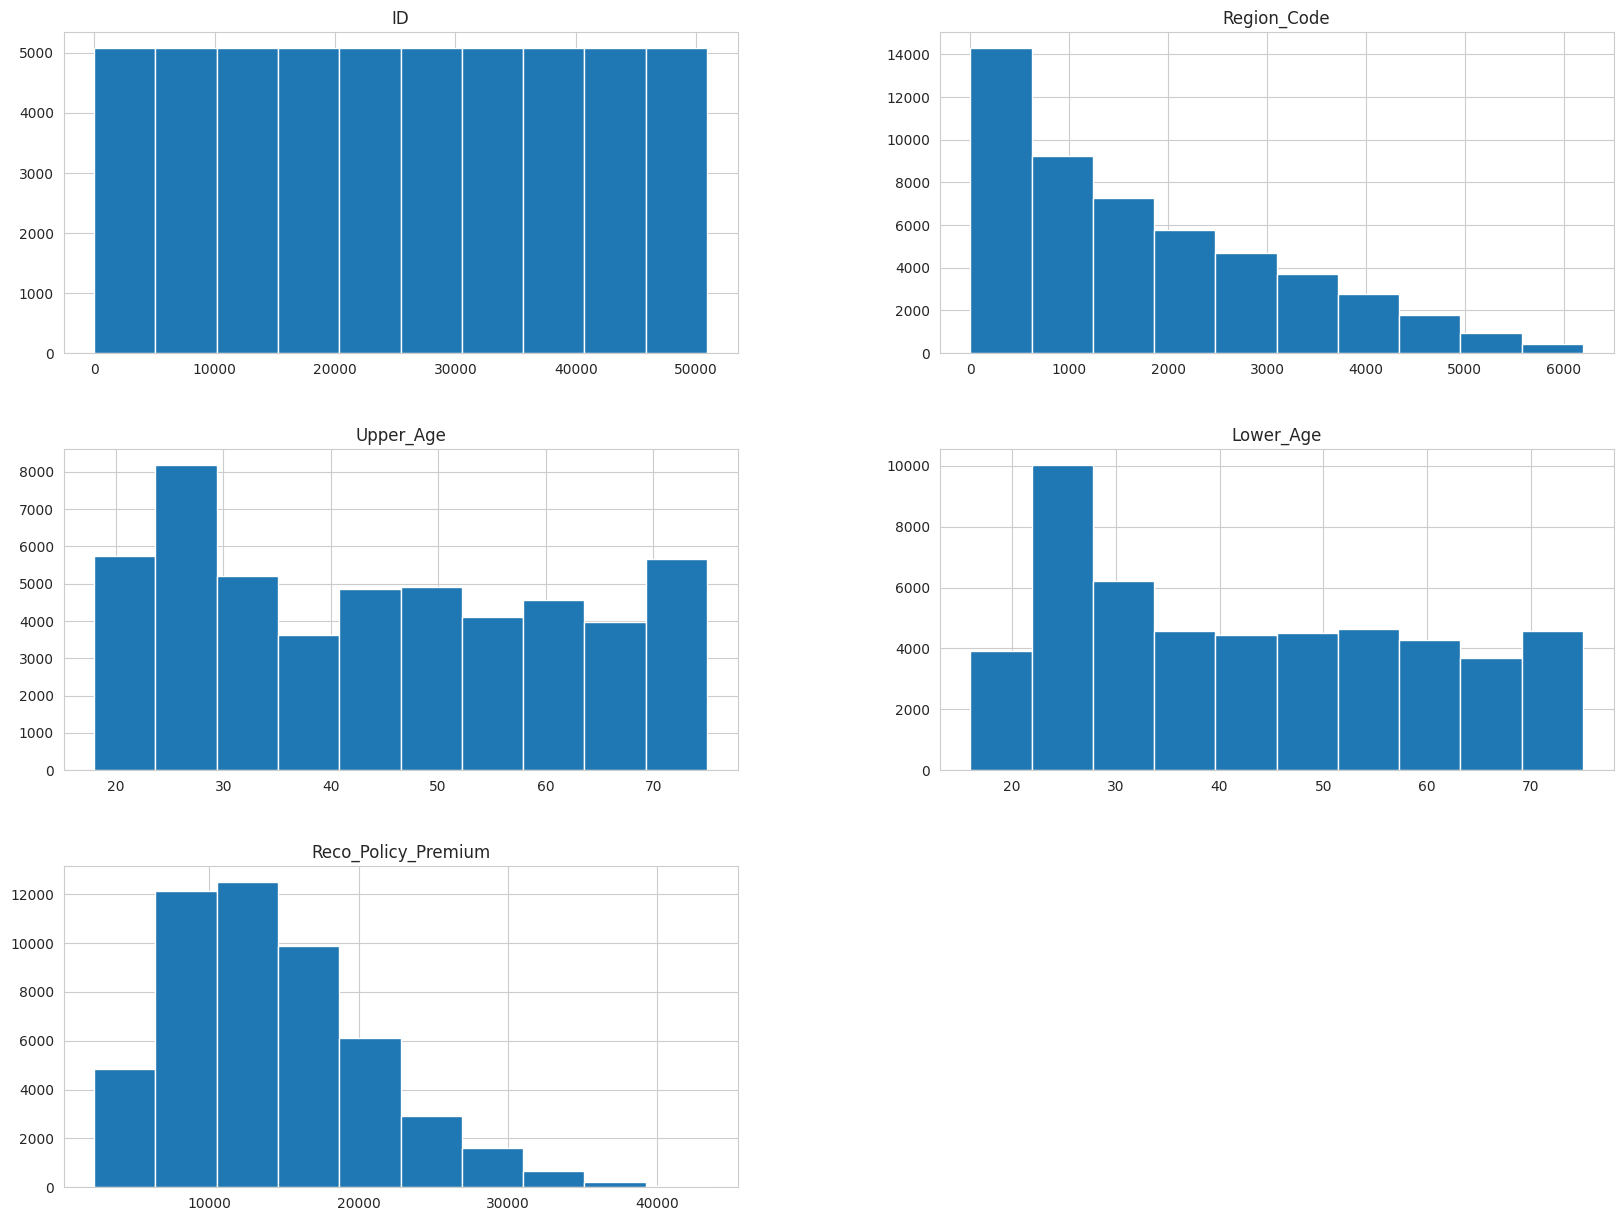

In [27]:
fig = train_df[num_attribs].hist(figsize=(20,15))

Let's visualize the relatinship between `Response` and `Reco_Policy_Premium` features in a boxplot.  

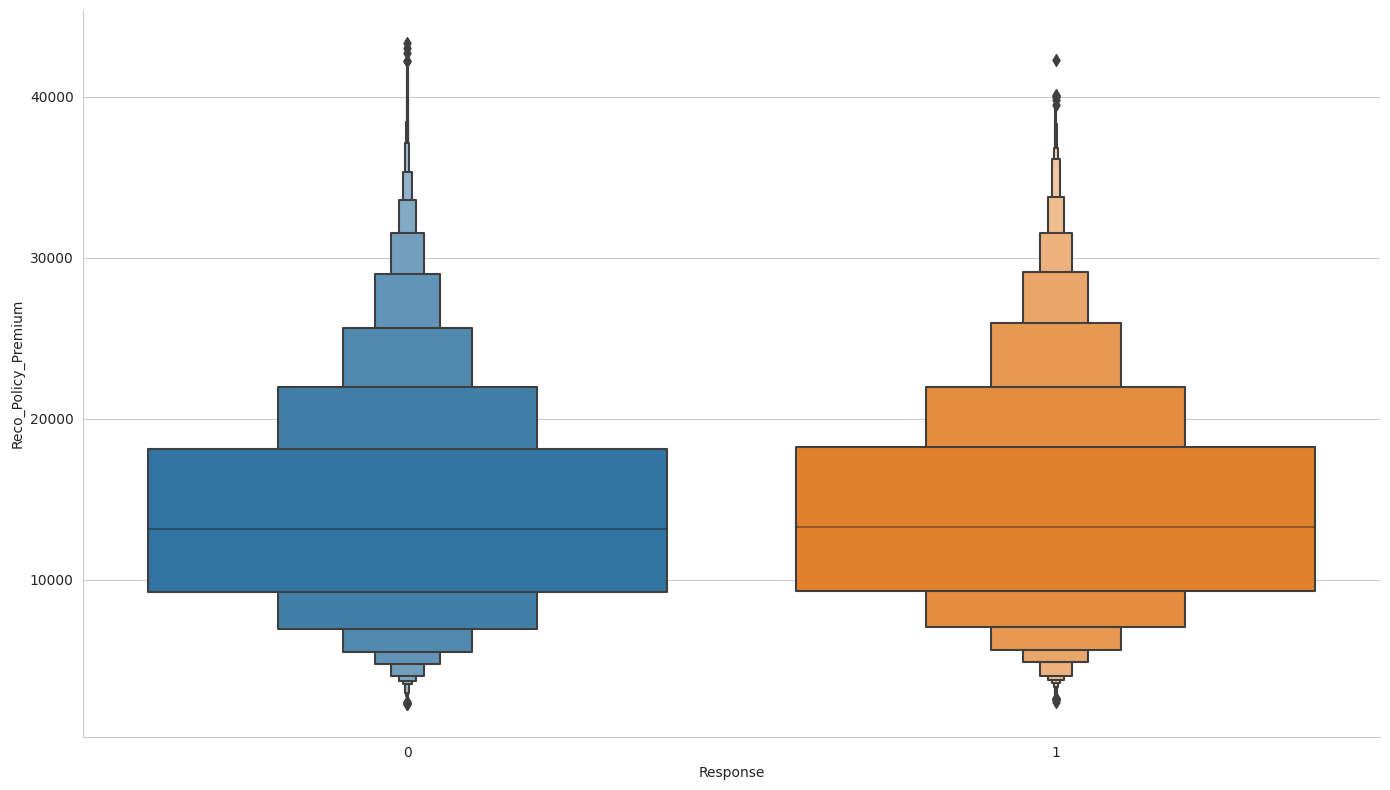

In [28]:
sns.catplot(x='Response', y='Reco_Policy_Premium', kind='boxen', data=train_df, height=8, aspect=1.75)

This boxplot shows the distribution of premium prices for our  recommended health policy, and is quite similar between `Lead` and `No-Lead` customers. What if the individual perceives the premium as excessively expensive for a specific type of policy?

Let's take into account the categories associated with premium prices for our recommended health policy:

In [29]:
sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='box', data=train_df, height=30, aspect=8)

With the following categorical boxplot, we can visualize the distribution of `Reco_Policy_Premium` for different categories in `Reco_Policy_Cat,` with different colors indicating the `Response` variable.

To better understand the premium amounts across insurance types, we can visualize the association between different responses.

Let's visualize box plots replacing `Reco_Policy_Cat` with `Reco_Insurance_Type`:

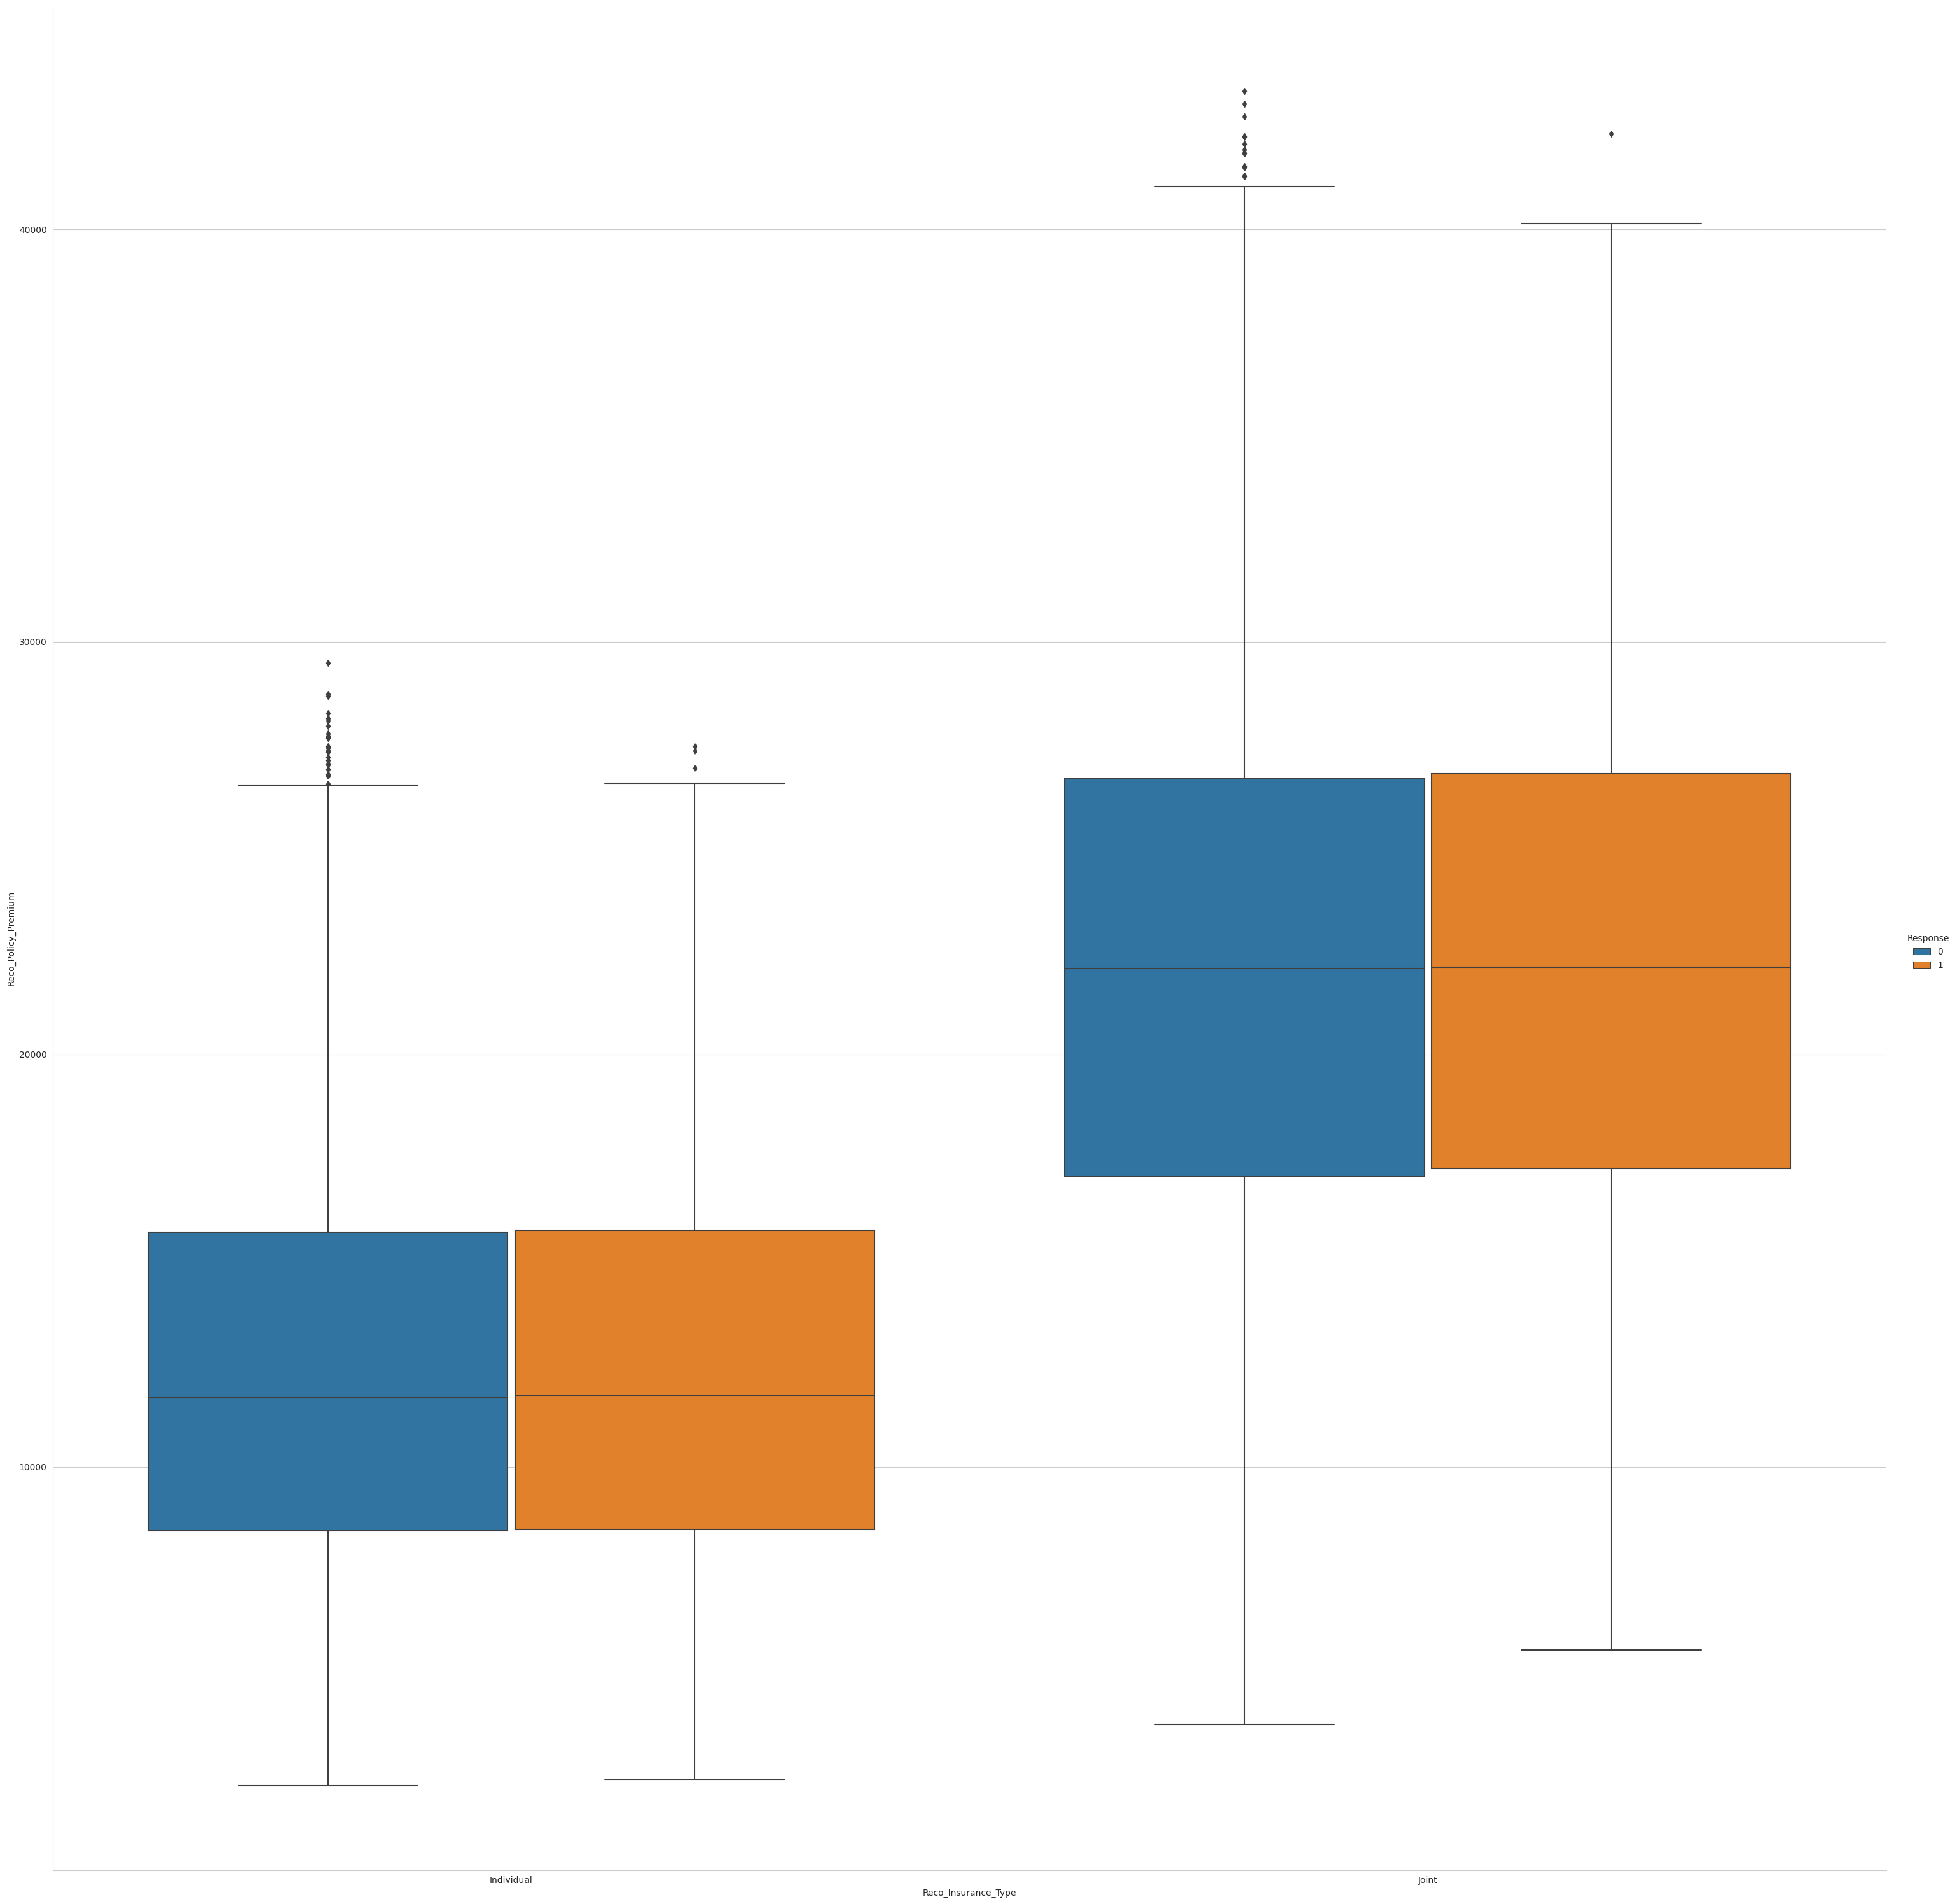

In [30]:
sns.catplot(x='Reco_Insurance_Type', y='Reco_Policy_Premium', hue='Response', kind='box', data=train_df, height=30)

For both response types, `Individual` class box plots have a range of premium prices for the recommended policy is lower than the ones seen in the `Joint` class. We assume that a higher premium price for `Joint` class might be one of the reasons for their leads going cold. There is no variation in the distribution of `Individual` and `Joint` accounts across both response types. This suggests that there isn't a strong relationship between insurance groups and response types.

Let's visualize box plots of `Upper_Age` and `Lower_Age` features against `Response`

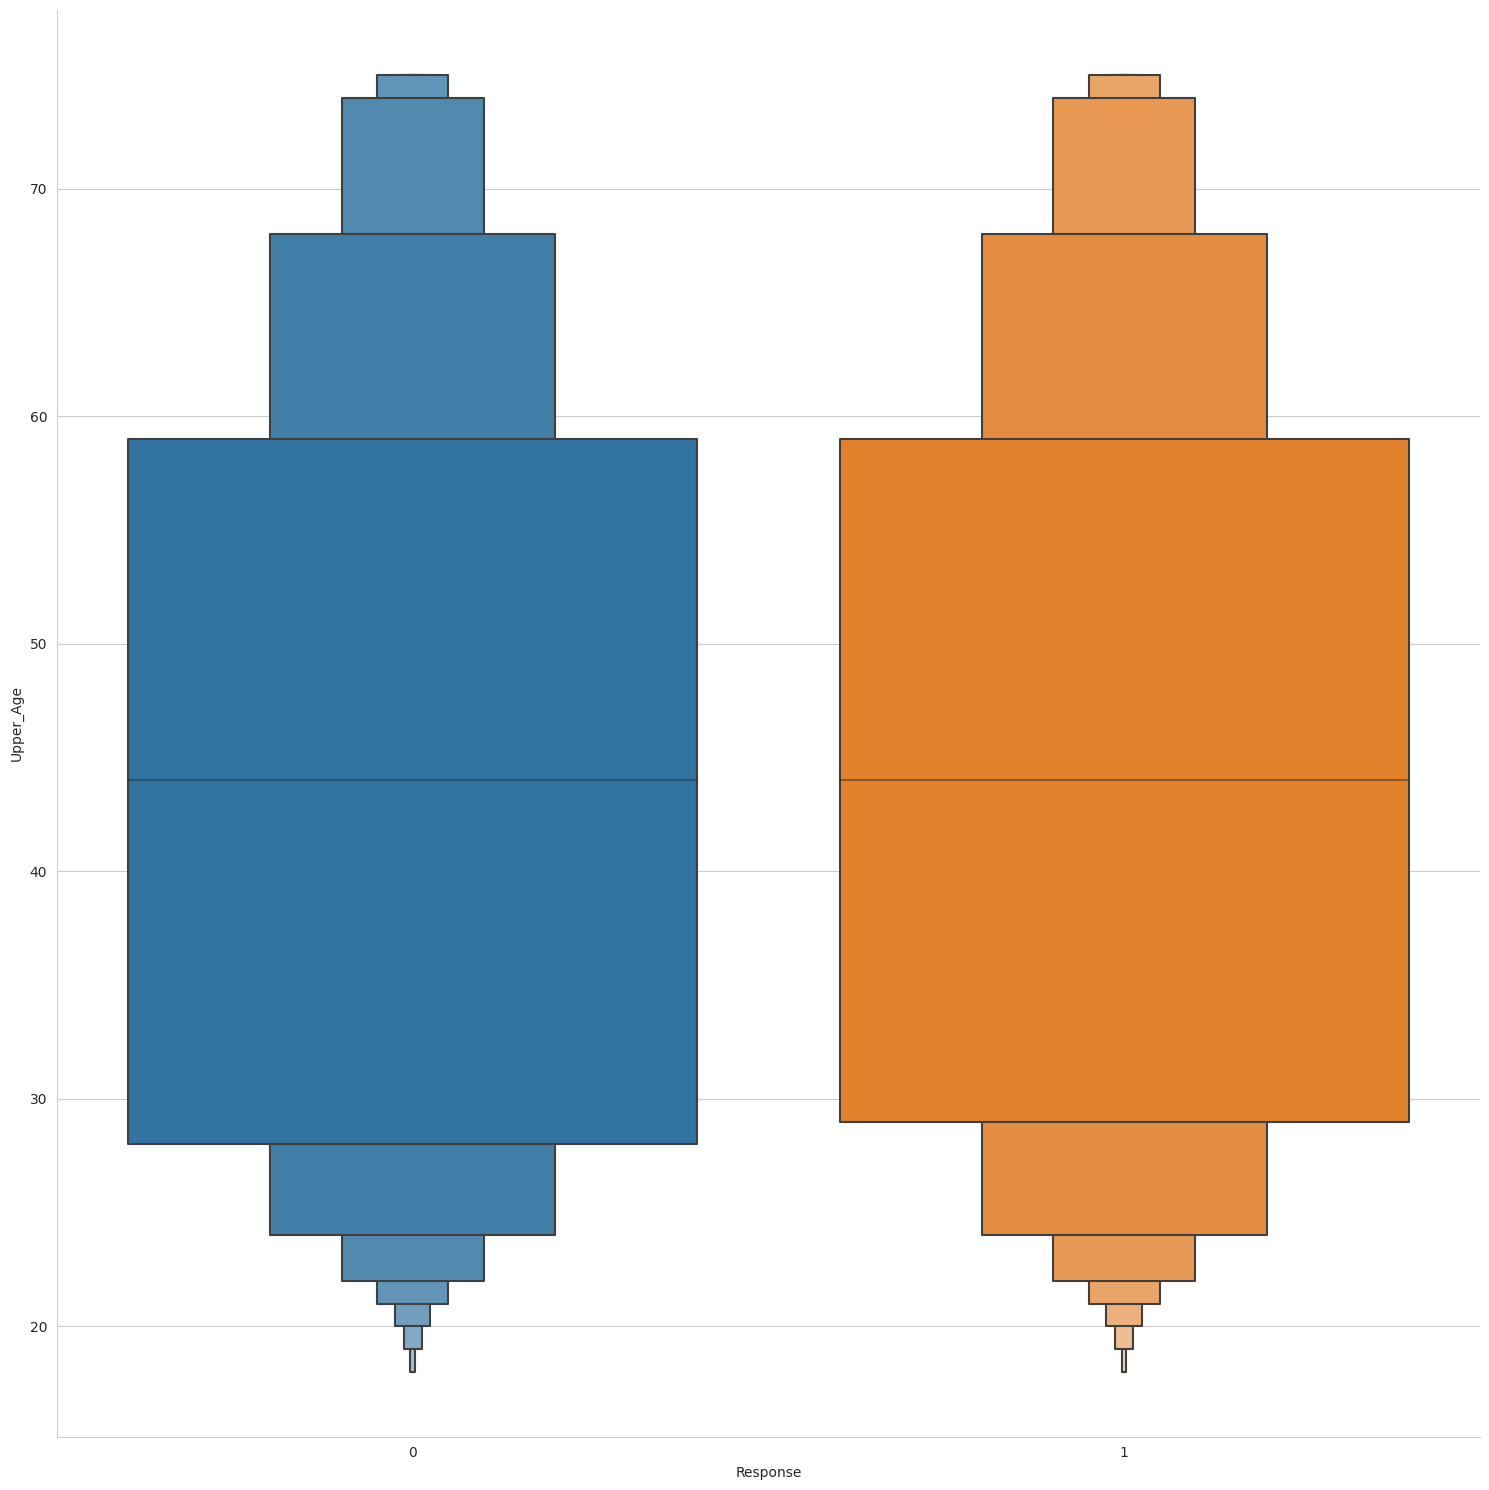

In [31]:
sns.catplot(x='Response', y='Upper_Age', kind='boxen', data=train_df, height=15)

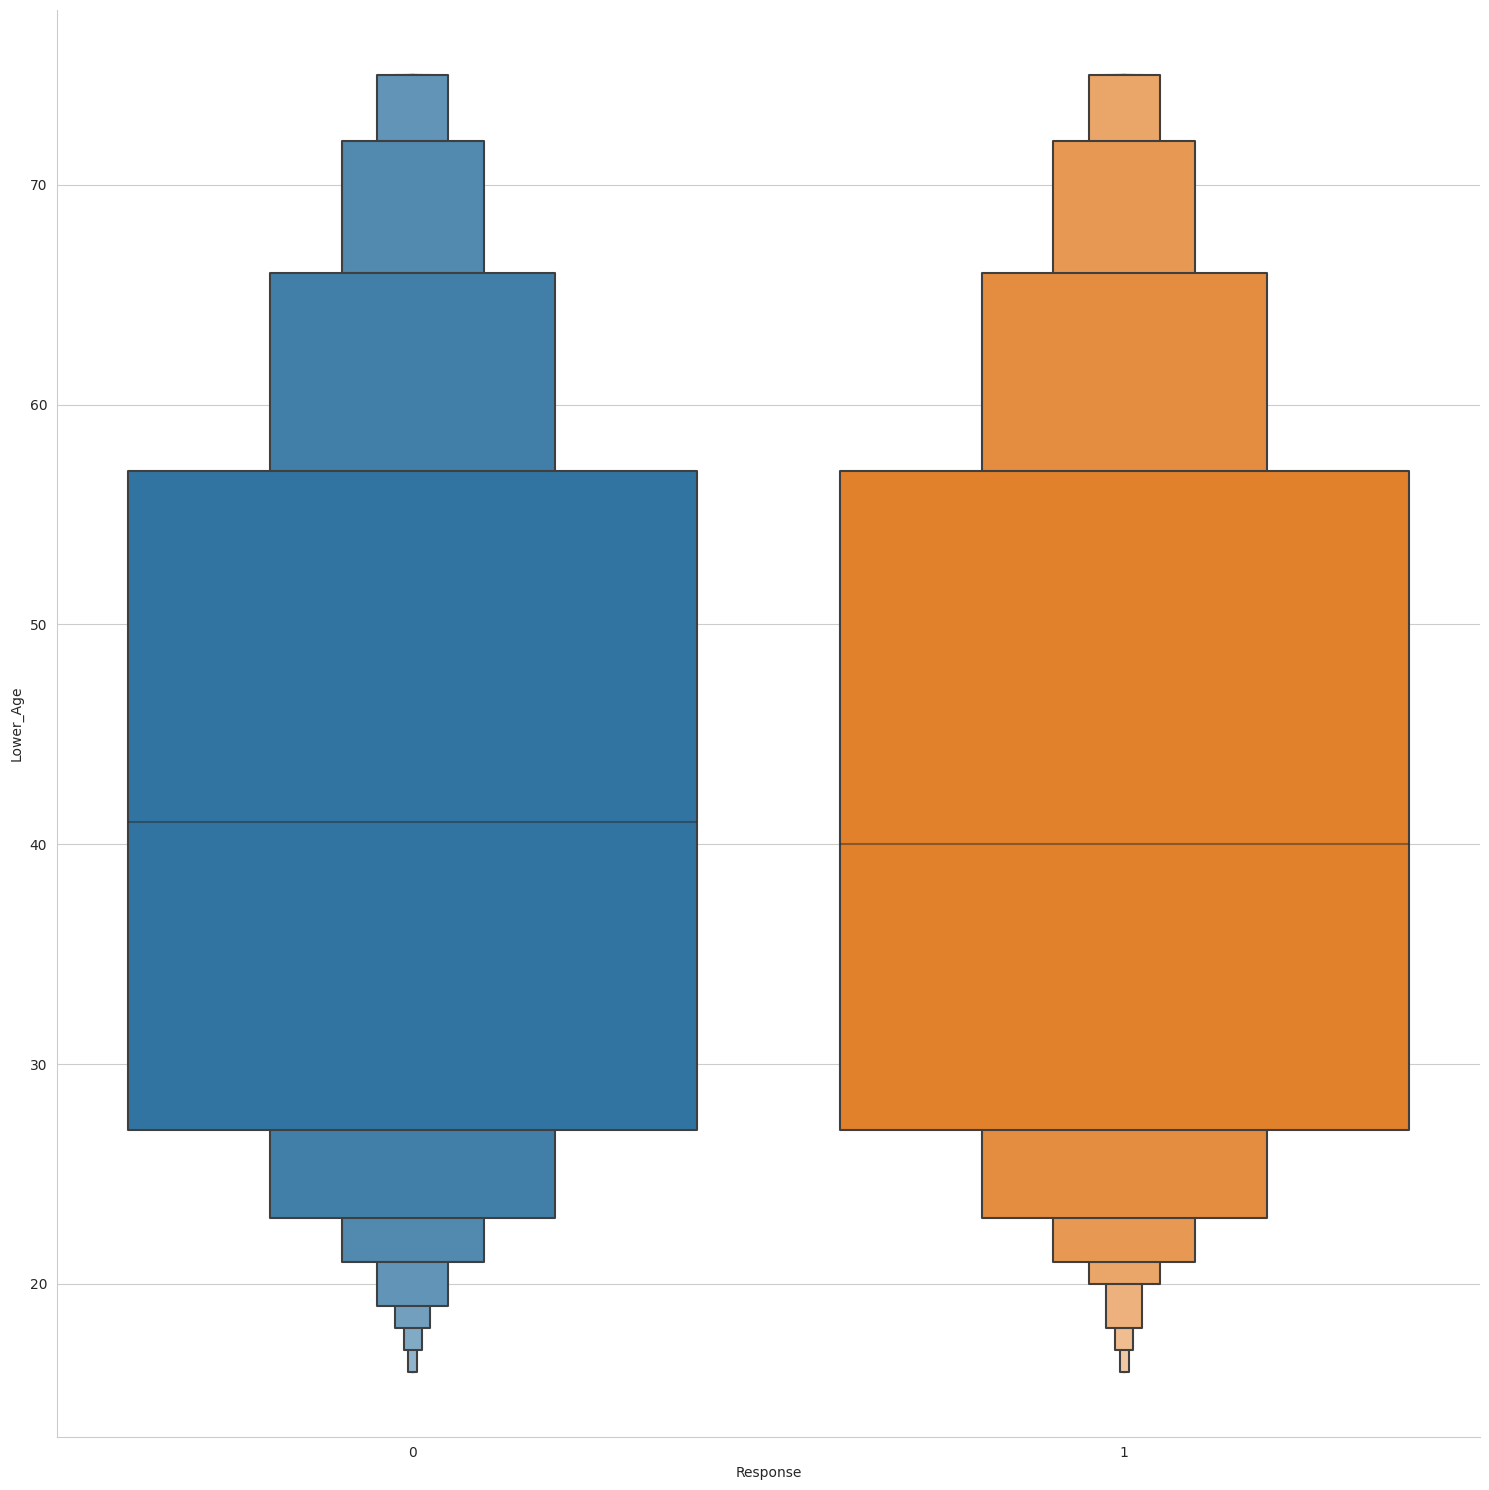

In [32]:
sns.catplot(x='Response', y='Lower_Age', kind='boxen', data=train_df, height=15)

For both response types, `Lower Age` and `Upper Age` of customer has a very little impact on the type of response we can get. But's let's try to factor in the health condition as well.

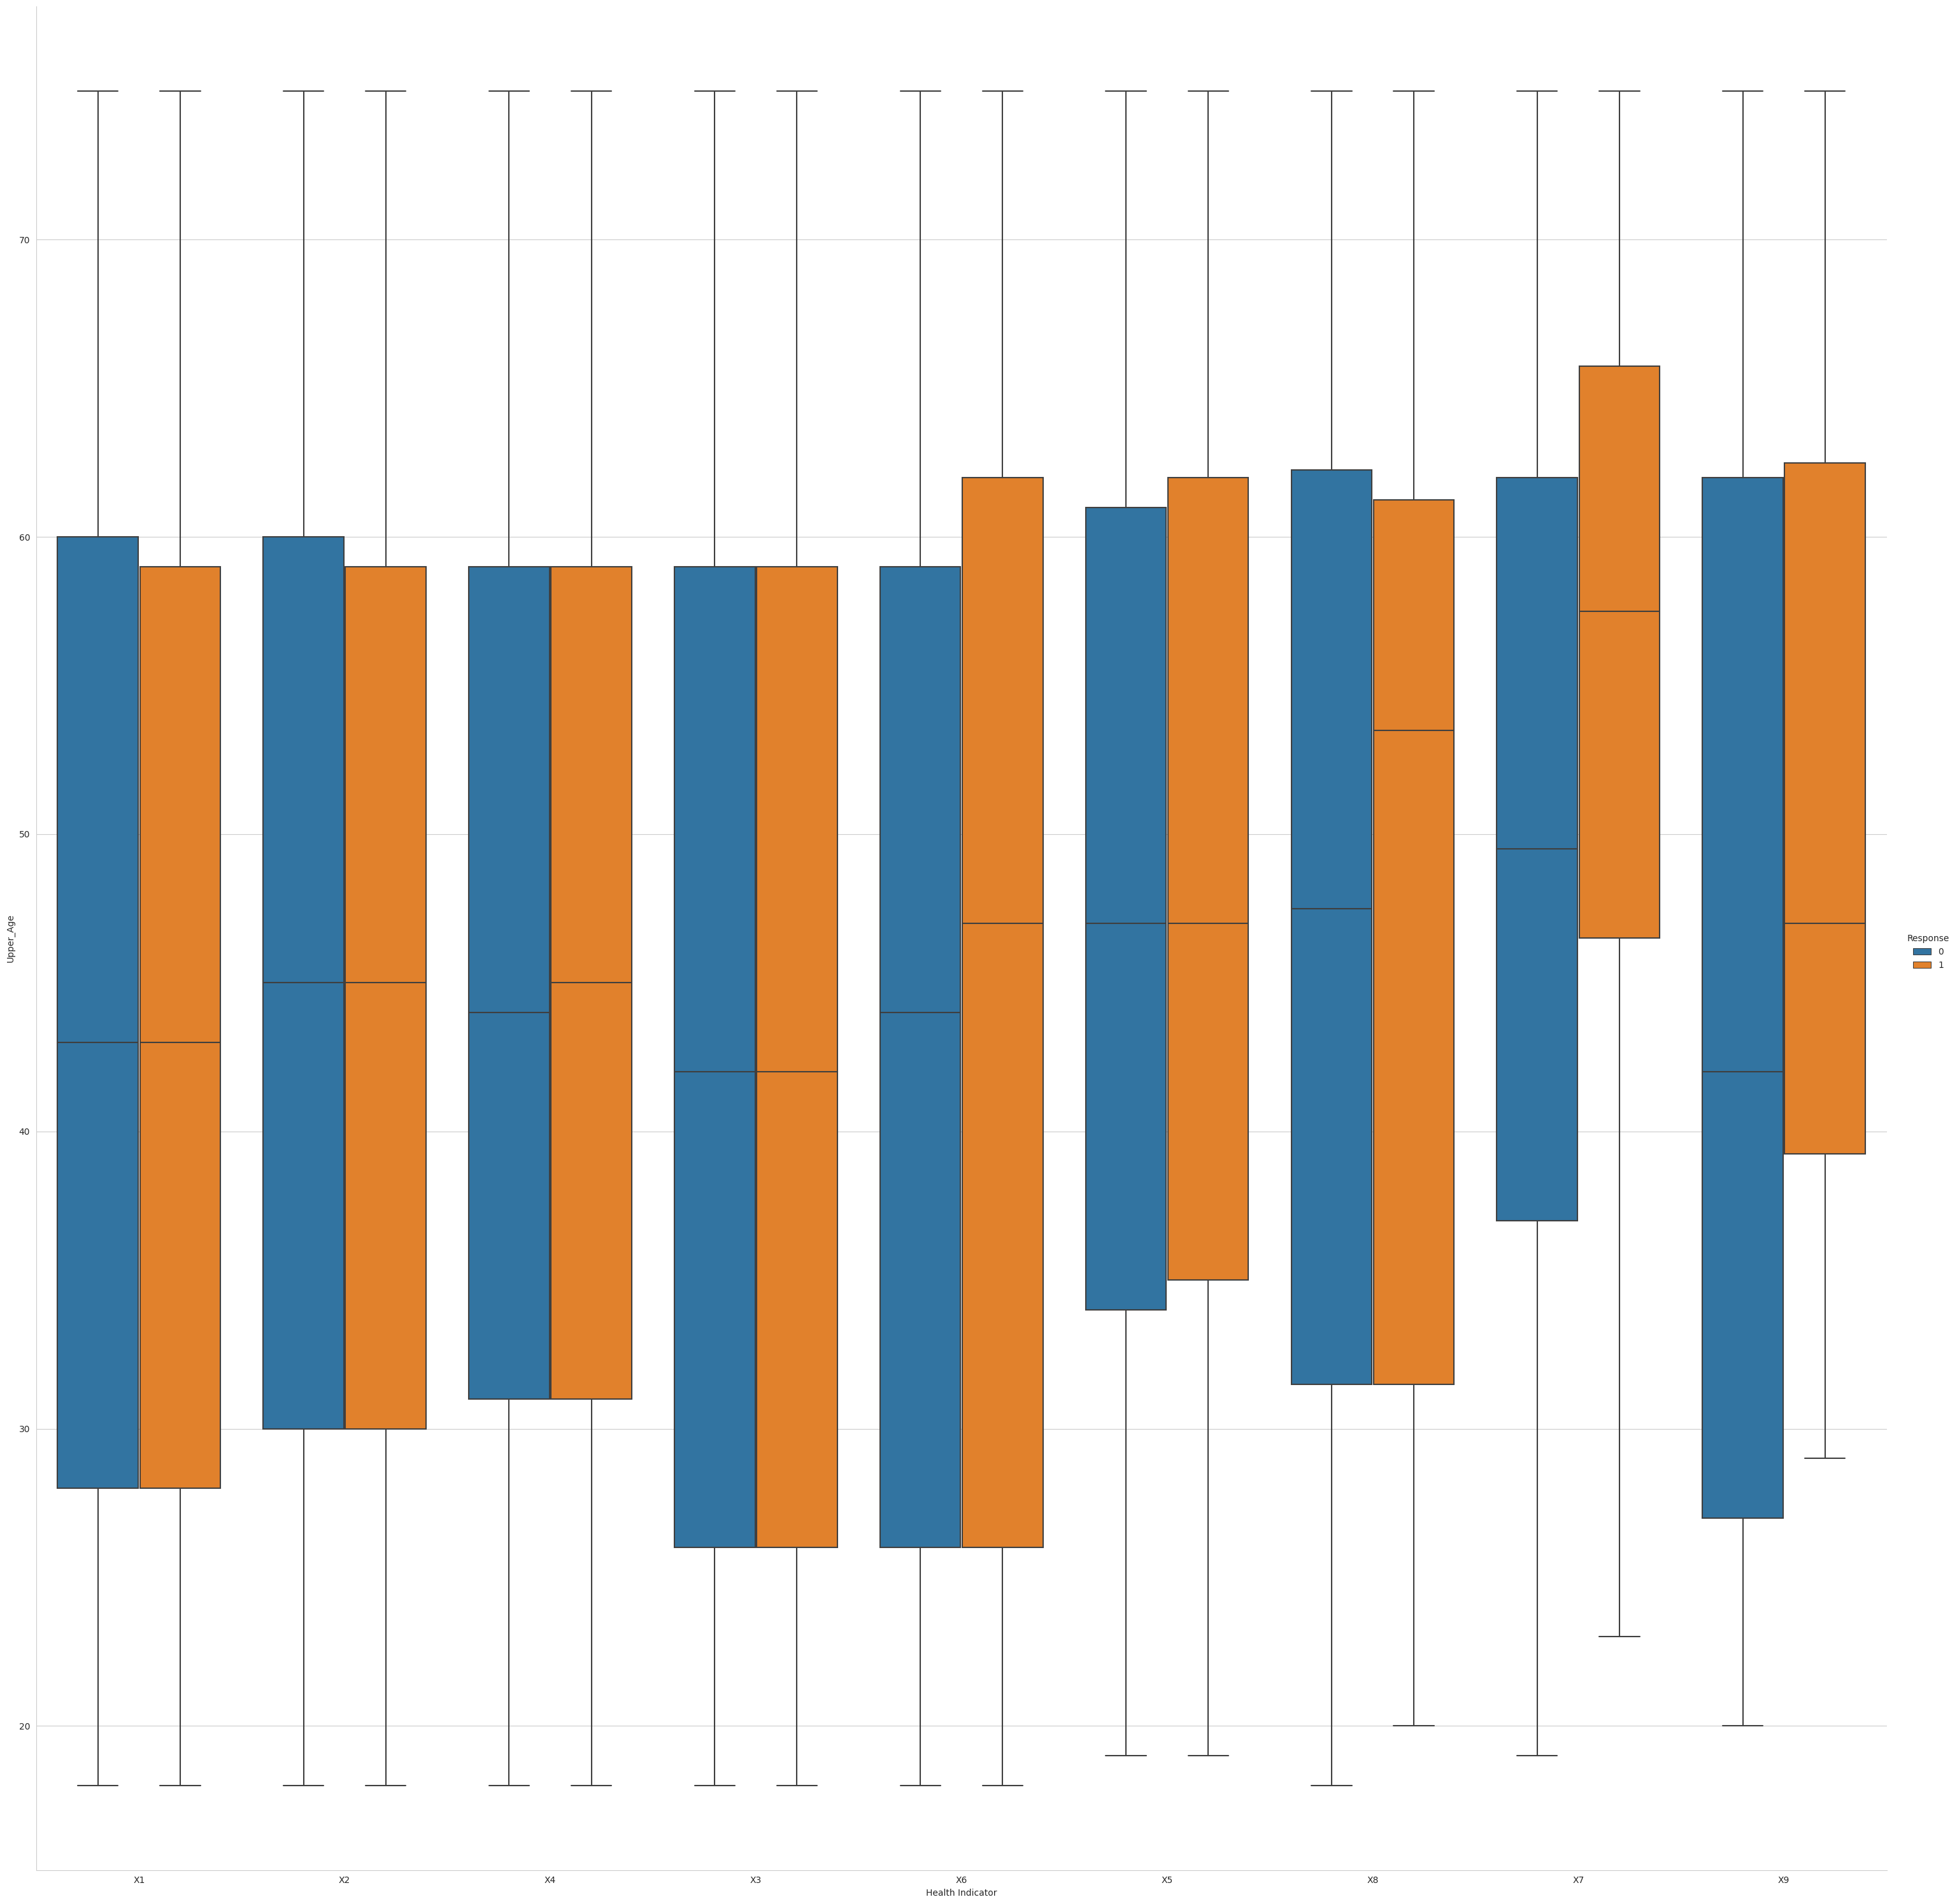

In [33]:
sns.catplot(x='Health Indicator', y='Upper_Age', hue='Response', kind='box', data=train_df, height=30);

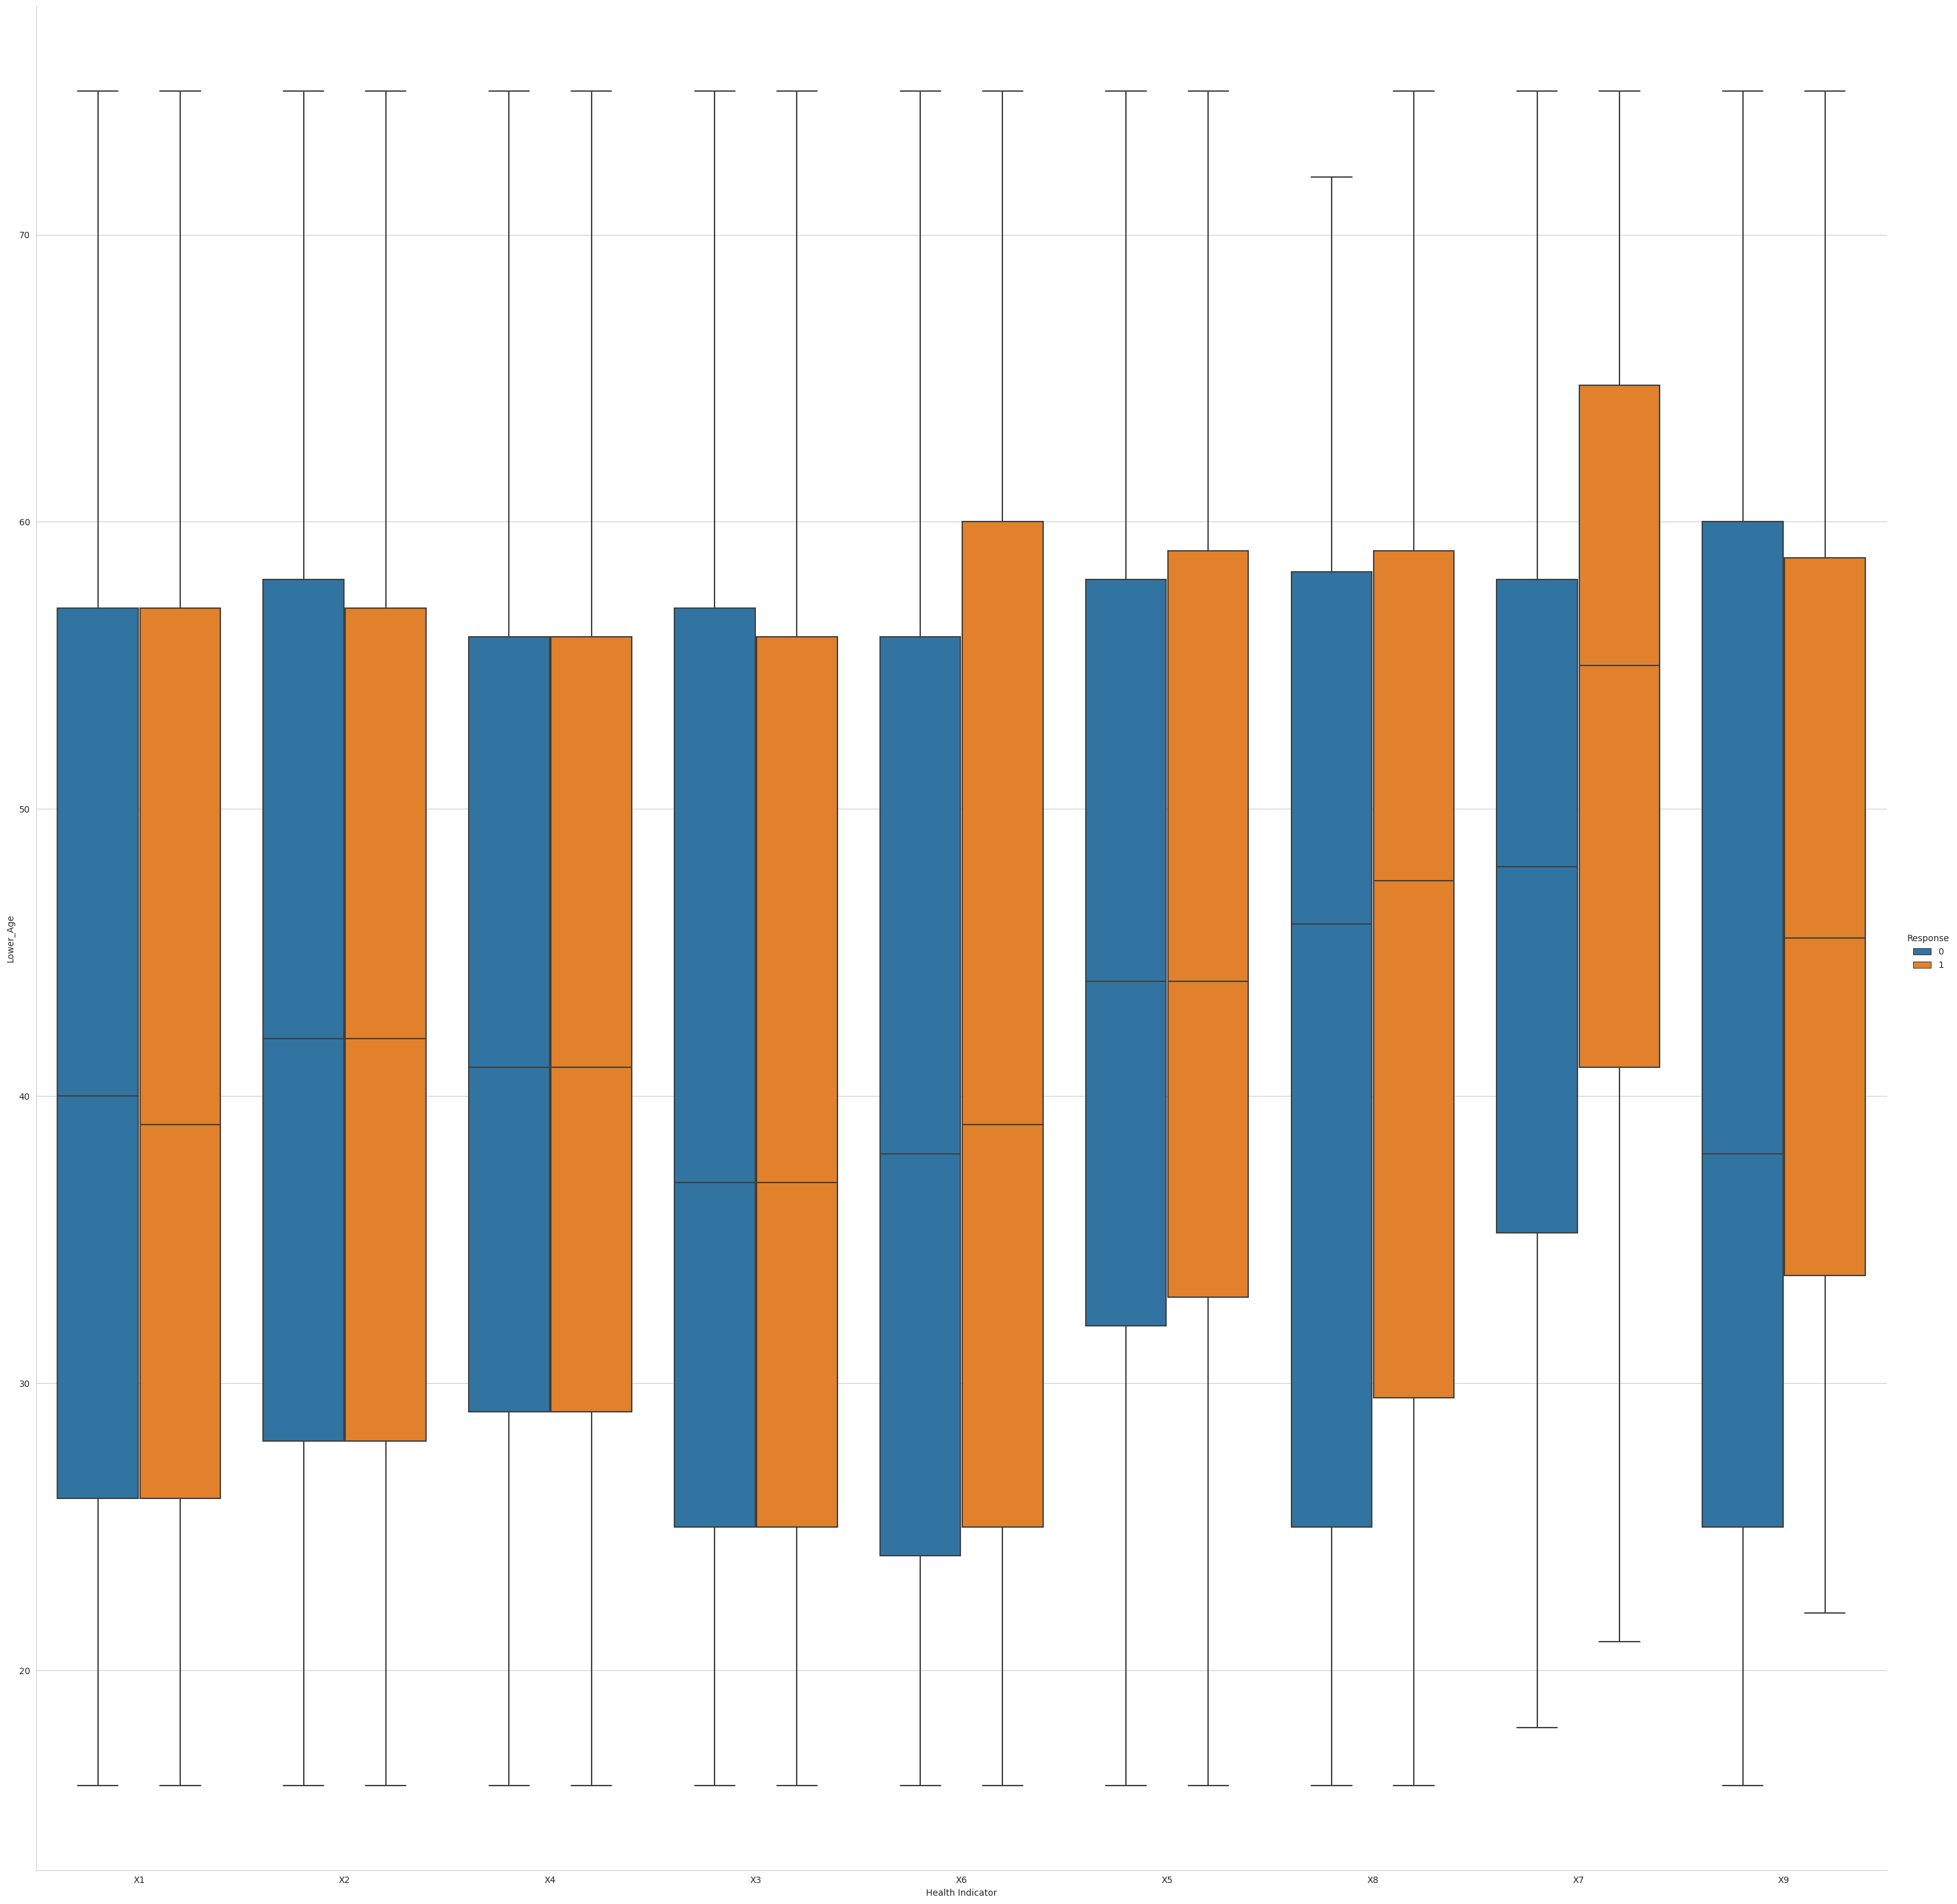

In [34]:
sns.catplot(x='Health Indicator', y='Lower_Age', hue='Response', kind='box', data=train_df, height=30);

There are certain health conditions like `X7`, `X8` and `X9` where the chances of getting a positive response is higher after a particular age limit.

## **Categorical Attributes**

To visualize how the ratio of responses affects the distribution of our categorical features, we need to calculate the response rate.

Let's use the categorical feature `City_Code` to show the distribution of ratios across multiple cities.

In [35]:
# Response Rate from Cities in the dataset
cities = train_df.groupby('City_Code').Response.value_counts().unstack()
cities['Ratio'] = cities[1]/cities[0]
cities.reset_index(inplace=True)

`Ratio` represents the ratio of the number of positive responses (1) to the number of negative responses (0) for each city.

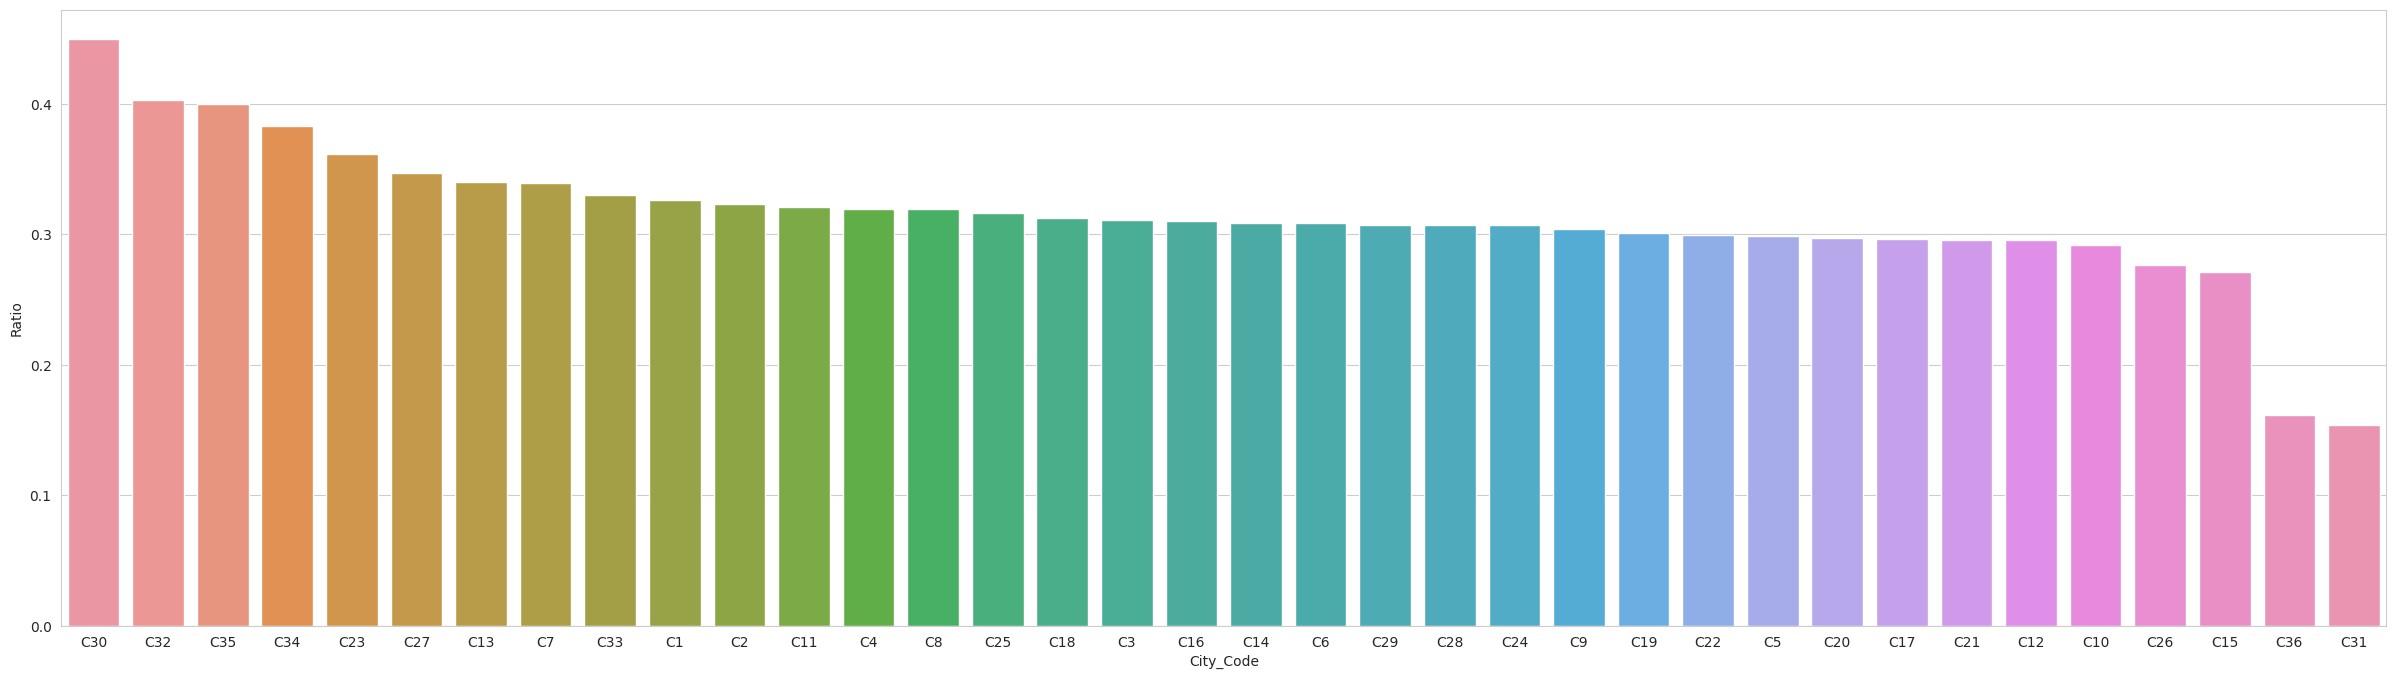

In [36]:
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.barplot(x='City_Code', y='Ratio', data=cities.sort_values(by=['Ratio'], ascending=False));

`Ratio` in every city is below 1, meaning there are more no-leads comapred to leads in every city. But there are certain cities which perrform better than average like C30 and C32.

We can also visualize the change in ratio by chaging `City_Code` with the `Accomodation_Type` feature.

In [37]:
# Response Rate from Accommodation Type in the dataset
accomodation = train_df.groupby('Accomodation_Type').Response.value_counts().unstack()
accomodation['Ratio'] = accomodation[1]/accomodation[0]
accomodation.reset_index(inplace=True)

We are expecting customers to exhibit similar responses between being `Lead` and `No-Lead`. However, an insurance premium is likely to have an impact on customers looking for accommodation.

Let's combine the `Accomodation_Type` with a secondary categorical feature such as `Reco_Insurance_Type`.

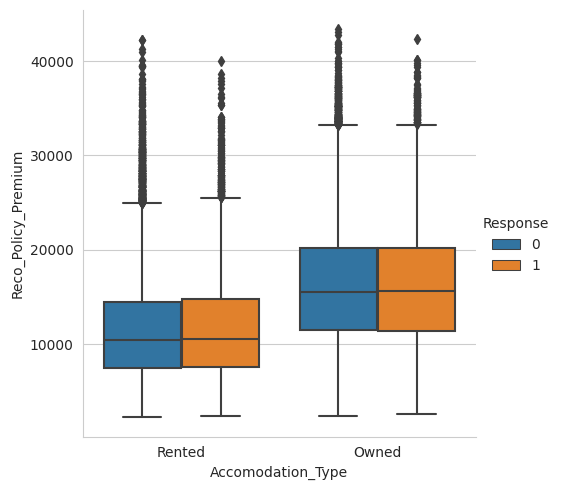

In [38]:
sns.catplot(x='Accomodation_Type', y='Reco_Policy_Premium', hue='Response', kind='box', data=train_df);

We can see that customers renting homes are less likely to buy insurances if the premium is too high.

## **Existing versus New Customers**

As we saw earlier, the `Holding_Policy_Duration` missing values (imputed with `0`) are likely to be new customers. So let's create a feature `Cust_Type` that can represent this.

In [39]:
train_df['Cust_Type'] = train_df['Holding_Policy_Duration'].apply(lambda x : 'New' if x==0 else 'Old')
test_df['Cust_Type'] = test_df['Holding_Policy_Duration'].apply(lambda x : 'New' if x==0 else 'Old')

In [40]:
# Response Rate from Customer Types
cust = train_df.groupby('Cust_Type').Response.value_counts().unstack()
cust['Ratio'] = cust[1]/cust[0]
cust.reset_index(inplace=True)

<Axes: xlabel='Cust_Type', ylabel='Ratio'>

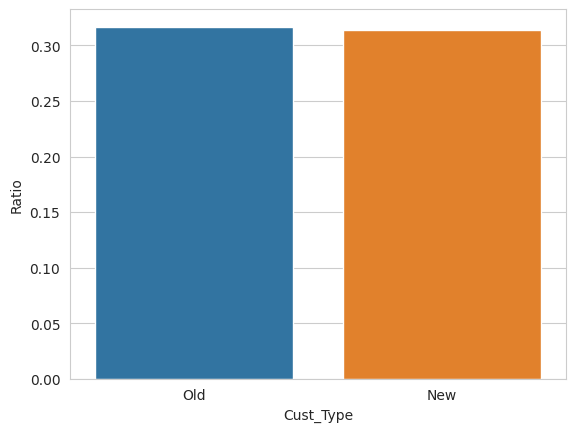

In [41]:
sns.barplot(x='Cust_Type', y='Ratio', data=cust.sort_values(by=['Ratio'], ascending=False))

Older customers are more likely to take up an offered insurance as compared to new ones.

From our EDA, we can see that there is no single variable responsible for determining the final class. Now that we've taken a closer look into the numerical and categorical distribution for all variables, let's start the feature engineering and selection process.

# **Feature Engineering**

Let's determine the relationship of each numerical variable with one another.

In [42]:
target=['Response']
not_features = ['ID', 'Response', 'kfold']
features = [feat for feat in num_attribs if feat not in not_features]
print(features)

['Region_Code', 'Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']


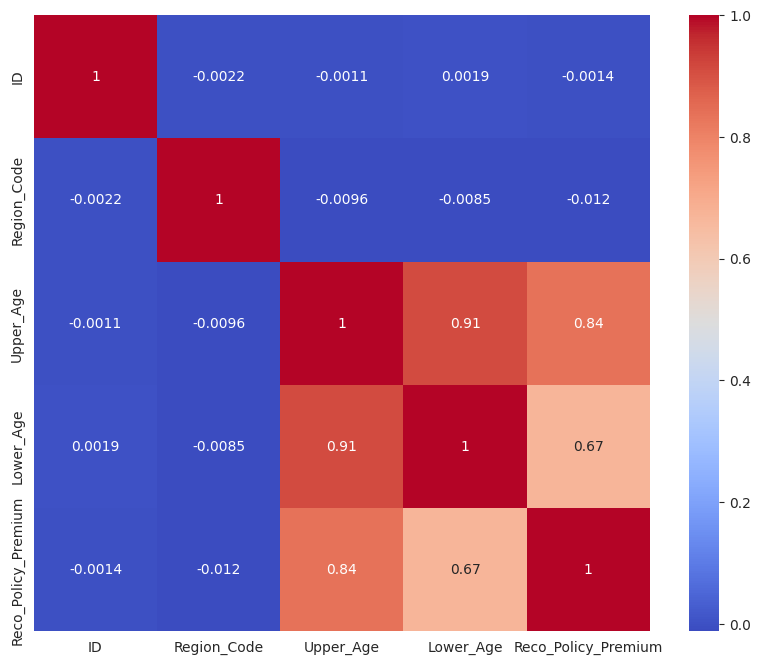

In [43]:
cor_spear = train_df[num_attribs].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(cor_spear, square=True, cmap='coolwarm', annot=True);

In this heatmap, you can see the recommended policy premium rises with `Age`.

**1. Premium Policy Logarithmic Transformation**

In our boxplot section, there was consistently a long tail when viewing the `Reco_Policy_Premium` feature. We can take the log of this feature to reduce the impact of its outliers.

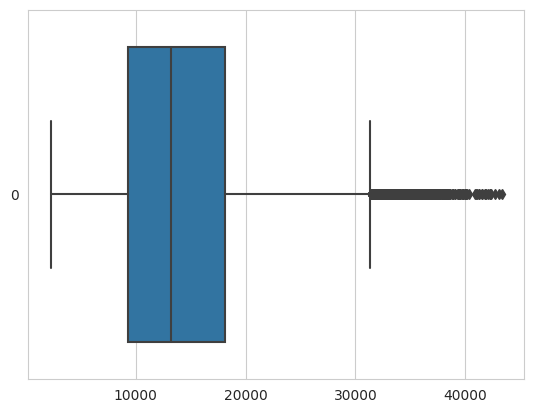

In [44]:
sns.boxplot(data=train_df['Reco_Policy_Premium'], orient="h");

Let's create new variables `Reco_Policy_Premium_log` in the training and testing sets.

In [45]:
train_df['Reco_Policy_Premium_log'] = np.log(train_df['Reco_Policy_Premium'])
test_df['Reco_Policy_Premium_log'] = np.log(test_df['Reco_Policy_Premium'])

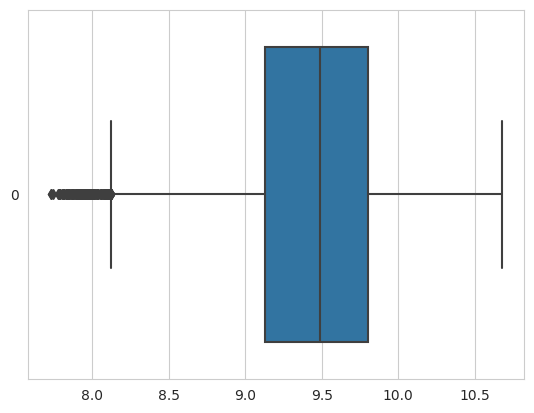

In [46]:
sns.boxplot(data=train_df['Reco_Policy_Premium_log'], orient="h");

After creating a logarithmic transformation, we can see a normal distribution with fewer outliers.

To make our premium policy price brackets more evenly distributed, we can place these prices into 10 and 50 bins for training and testing sets.

In [47]:
train_df['Reco_Policy_Premium_Bin_10'] = pd.cut(train_df['Reco_Policy_Premium_log'], bins=10, labels=False)
train_df['Reco_Policy_Premium_Bin_50'] = pd.cut(train_df['Reco_Policy_Premium_log'], bins=50, labels=False)
test_df['Reco_Policy_Premium_Bin_10'] = pd.cut(test_df['Reco_Policy_Premium_log'], bins=10, labels=False)
test_df['Reco_Policy_Premium_Bin_50'] = pd.cut(test_df['Reco_Policy_Premium_log'], bins=50, labels=False)

**2. Customer Duration Groups**

If a person is a long-term customer, they have a `Holding_Policy_Duration` of more than 14 days.

Let's assign it to be a binary variable to fit within our classification problem.

In [48]:
train_df['Long_Term_Cust'] = np.where(train_df['Holding_Policy_Duration'] == '14+', 'Yes', 'No')
test_df['Long_Term_Cust'] = np.where(test_df['Holding_Policy_Duration'] == '14+', 'Yes', 'No')

**3. Customer Age Buckets**

Let's set buckets within which we can reasonably expect a range of age groups to fall in the training and testing sets.

Let's start by calculating the `Mean_Age` by dividing two instances of `Upper_Age` by two to receive an average.

In [49]:
train_df['Mean_Age'] = (train_df['Upper_Age'] + train_df['Upper_Age'])/2
test_df['Mean_Age'] = (test_df['Upper_Age'] + test_df['Upper_Age'])/2

Let's create buckets of mean ages into 10 and 50 bins for the training and testing sets.

In [50]:
train_df['Mean_Age_Bin_10'] = pd.cut(train_df['Mean_Age'], bins=10, labels=False)
train_df['Mean_Age_Bin_50'] = pd.cut(train_df['Mean_Age'], bins=50, labels=False)
test_df['Mean_Age_Bin_10'] = pd.cut(test_df['Mean_Age'], bins=10, labels=False)
test_df['Mean_Age_Bin_50'] = pd.cut(test_df['Mean_Age'], bins=50, labels=False)

## **Feature Encoding**

Once we split the data based on their definition into (1) Categorical and (2) Numeric Data types.

In [51]:
target = ['Response']
not_features = ['ID', 'Response', 'kfold']
cols = list(train_df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Cust_Type', 'Reco_Policy_Premium_log', 'Reco_Policy_Premium_Bin_10', 'Reco_Policy_Premium_Bin_50', 'Long_Term_Cust', 'Mean_Age', 'Mean_Age_Bin_10', 'Mean_Age_Bin_50']


In [52]:
categorical_features = [
    'Accomodation_Type', 'Reco_Insurance_Type', 'City_Code', 'Region_Code',
    'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
    'Holding_Policy_Type','Reco_Policy_Cat', 'Cust_Type', 'Long_Term_Cust',
    'Mean_Age_Bin_10', 'Mean_Age_Bin_50', 'Reco_Policy_Premium_Bin_10', 'Reco_Policy_Premium_Bin_50'
]

numerical_features = [feat for feat in features if feat not in categorical_features]

print(f'Categorical Features: {categorical_features}')
print(f'Numeric Features: {numerical_features}')

Categorical Features: ['Accomodation_Type', 'Reco_Insurance_Type', 'City_Code', 'Region_Code', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Cust_Type', 'Long_Term_Cust', 'Mean_Age_Bin_10', 'Mean_Age_Bin_50', 'Reco_Policy_Premium_Bin_10', 'Reco_Policy_Premium_Bin_50']
Numeric Features: ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium', 'Reco_Policy_Premium_log', 'Mean_Age']


Let's convert each of the categorical columns to the correct datatype: string

In [53]:
for df in [train_df, test_df]:
    df[categorical_features] = df[categorical_features].astype(str)

Let's convert each of the numerical columns and target feature to the correct datatype: float

In [54]:
for df in [train_df, test_df]:
    df[numerical_features] = df[numerical_features].astype('float64')

In [55]:
train_df[target] = train_df[target].astype('float64')

In [56]:
# Create a datasetShape function that creates a dataframe with custom numerical and categorical features
# def datasetShape(df):
    # rows, cols = df.shape
    # print("The dataframe has",rows,"rows and",cols,"columns.")

In [57]:
## Training Set
# Extract numerical and categorical for binary classification and scaling
# custom_feat = ['City_Code', 'Health Indicator']
# for feat in train_df.columns:
    # if len(train_df[feat].unique()) > 2 and feat in custom_feat:
        # dummyVars = pd.get_dummies(train_df[feat], drop_first=True, prefix=feat+"_")
        # train_df = pd.concat([train_df, dummyVars], axis=1)
        # train_df.drop(feat, axis=1, inplace=True)
# datasetShape(train_df)

# train_df.head()

The dataframe has 50882 rows and 63 columns.


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code__C8,City_Code__C9,Health Indicator__X2,Health Indicator__X3,Health Indicator__X4,Health Indicator__X5,Health Indicator__X6,Health Indicator__X7,Health Indicator__X8,Health Indicator__X9
0,1,3213,Rented,Individual,36.0,36.0,No,14+,3.0,22,...,0,0,0,0,0,0,0,0,0,0
1,2,1117,Owned,Joint,75.0,22.0,No,0,0.0,22,...,0,0,1,0,0,0,0,0,0,0
2,3,3732,Owned,Individual,32.0,32.0,No,1.0,1.0,19,...,0,0,0,0,0,0,0,0,0,0
3,4,4378,Owned,Joint,52.0,48.0,No,14+,3.0,19,...,0,0,0,0,0,0,0,0,0,0
4,5,2190,Rented,Individual,44.0,44.0,No,3.0,1.0,16,...,1,0,1,0,0,0,0,0,0,0


In [58]:
## Testing Set
# Extract numerical and categorical for binary classification and scaling
# custom_feat = ['City_Code', 'Health Indicator']
# custom_feat = ['Health Indicator']
# for feat in test_df.columns:
    # if len(test_df[feat].unique()) > 2 and feat in custom_feat:
        # dummyVars = pd.get_dummies(test_df[feat], drop_first=True, prefix=feat+"_")
        # test_df = pd.concat([test_df, dummyVars], axis=1)
        # test_df.drop(feat, axis=1, inplace=True)
# datasetShape(test_df)

# test_df.head()

The dataframe has 21805 rows and 62 columns.


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code__C8,City_Code__C9,Health Indicator__X2,Health Indicator__X3,Health Indicator__X4,Health Indicator__X5,Health Indicator__X6,Health Indicator__X7,Health Indicator__X8,Health Indicator__X9
0,50883,156,Owned,Individual,30.0,30.0,No,6.0,3.0,5,...,0,0,0,0,0,0,0,0,0,0
1,50884,7,Owned,Joint,69.0,68.0,Yes,3.0,3.0,18,...,0,0,0,0,0,0,0,0,0,0
2,50885,564,Rented,Individual,28.0,28.0,No,2.0,4.0,17,...,0,0,0,1,0,0,0,0,0,0
3,50886,1177,Rented,Individual,23.0,23.0,No,3.0,3.0,18,...,0,0,0,1,0,0,0,0,0,0
4,50887,951,Owned,Individual,75.0,75.0,No,0,0.0,5,...,0,0,0,1,0,0,0,0,0,0


# **Machine Learning Model Building**

Let's start the building process of machine learning models that performs the best in predicting for whether the person will be interested in their proposed health plan/policy.

## **Prediction Models: Binary Classification**

**Feature Selection**

Let's set our target feature to `Response` and assign it to our outcome in `y` and the rest of our inputs in `X`

In [59]:
# set target feature
targetFeature='Response'

In [60]:
y = train_df.pop(targetFeature)
X = train_df

**Split Training and Testing Data**

Let's split a dataset into training and testing subsets using the `train_test_split` function. Allocate 30% of the data that to the testing set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [62]:
print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (35617, 62)  y_train: (35617,)
X_test: (15265, 62)  y_test: (15265,)


**One-Hot Encoding**

Let's convert our categorical variables into numerical format by creating binary columns for each category within the categorical features.

In [63]:
# Categorical variables in the Health Insurance Lead
X_train[['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Cust_Type']]

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Cust_Type
37406,Owned,Individual,No,Old
45617,Rented,Individual,No,New
180,Owned,Joint,No,Old
28725,Owned,Individual,No,Old
16605,Rented,Individual,No,New
...,...,...,...,...
25544,Owned,Individual,No,Old
48056,Owned,Individual,No,New
11513,Owned,Joint,Yes,Old
1688,Rented,Individual,No,Old


We need to convert the categorical data into numeric features. The simplest way is to one-hot encode each categorical feature with the `OneHotEncoder`.

Let's give an example for the `Accomodation_Type`, `Reco_Insurance_Type`, `Is_Spouse`, and `Cust_Type`. Note that we also encounter some data which are missing. We will use a `SimpleImputer` to replace the missing values with a constant values.

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

ohe = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded = ohe.fit_transform(X_train[['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Cust_Type']])
X_encoded.toarray()

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

Categorical variables are now transformed to binary (0s and 1`s) for our predictive models. The resulting dataframes will contain the encoded binary features that can be used as inputs.

In [65]:
X_encoded

<35617x8 sparse matrix of type '<class 'numpy.float64'>'
	with 142468 stored elements in Compressed Sparse Row format>

We want to standardize the numerical features. Thus, we need to split the original data into 2 subgroups and apply a different preprocessing: (i) one-hot encoding for the categorical data and (ii) standard scaling for the numerical data. We also need to handle missing values in both cases.

1. We replace the missing values by ignoring the `'unknown'` string values interpreted as a category.
2. We also replace missing numerical data by the mean values of the target feature using `SimpleImputer` command.

In [66]:
col_cat = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Region_Code', 'Cust_Type',
           'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Long_Term_Cust',
           'Mean_Age_Bin_10', 'Mean_Age_Bin_50', 'Reco_Policy_Premium_Bin_10', 'Reco_Policy_Premium_Bin_50']
col_num = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium', 'Reco_Policy_Premium_log', 'Mean_Age']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

In [68]:
X_train_cat_enc

<35617x5221 sparse matrix of type '<class 'numpy.float64'>'
	with 463021 stored elements in Compressed Sparse Row format>

In [69]:
X_train_num_scaled

array([[-0.85988879, -0.73628448, -0.74789254, -0.64280566, -0.85988879],
       [-1.43707509, -1.3129368 , -1.16864688, -1.37091713, -1.43707509],
       [ 0.35220242, -1.54359772,  1.86193546,  1.50399305,  0.35220242],
       ...,
       [-0.16726524, -0.15963217,  0.76439974,  0.85117871, -0.16726524],
       [ 1.62201227,  1.74332047,  0.86090969,  0.91771646,  1.62201227],
       [-0.22498387, -0.10196693,  0.08392274,  0.30814631, -0.22498387]])

We should apply these transformations on the training and testing sets

In [70]:
import numpy as np
from scipy import sparse

X_train_scaled = sparse.hstack((X_train_cat_enc,
                                sparse.csr_matrix(X_train_num_scaled)))
X_test_scaled = sparse.hstack((X_test_cat_enc,
                               sparse.csr_matrix(X_test_num_scaled)))

Once the transformation is done, we can combine this information of all numerical values now.

Let's start building our binary classification using various classifiers such as `LogisticRegression` and `XGBoost` as the model.

Prints out various evaluation metrics for a classification task. Like:

    1. Classification Accuracy
    2. ROC-AUC Score
    3. Precision
    4. Recall
    5. F1 Score
    6. Confusion matrix

All score are calculated in base format. No averaging is performed.

    clf - Classification Model
    x - Input features
    cv - Cross Validation criteria
    fold - fold number for confusion matrix
    features - Feature column names
    target - Target column name

## **Logistic Regression**

Choose model: `sklearn.linear_model.LogisticRegression`

In [68]:
from sklearn.linear_model import LogisticRegression

In [121]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Lets apply sample weights because it addresses class imbalance issues seen in our `Response` feature.

In [ ]:
import sklearn.utils as sku
sample_weights = sku.class_weight.compute_sample_weight('balanced', y_train)
sample_weights

Let's predict for the scaled training and testing datasets. Then, we can determine the accuracy score for both sets.

In [123]:
import sklearn.metrics as skm

# Create the printScore function to calculate the ROC AUC score.
def printScore(y_train, y_train_pred):
    print(skm.roc_auc_score(y_train, y_train_pred))

# Predict for the training and testing scaled sets along with calculating for accuracy score
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)
accuracy_train = skm.accuracy_score(y_train, y_train_pred)
print('Accuracy score of the {} in the training set is {:.2f}'.format(clf.__class__.__name__, accuracy_train))
accuracy_test = skm.accuracy_score(y_test, y_test_pred)
print('Accuracy score of the {} in the testing set is {:.2f}'.format(clf.__class__.__name__, accuracy_test))

Accuracy score of the LogisticRegression in the training set is 0.78
Accuracy score of the LogisticRegression in the testing set is 0.76


The accuracy score from our `LogisticRegression` classification model is 0.76, which can be improved upon.

Let's create a `pringScore` function to produce evaluation metrics for our `LogisticRegression` model

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def printScore(y_true, y_pred, dataset_name=""):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    try:
        # Calculate ROC AUC score
        roc_auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        # Handle the case where ROC AUC cannot be calculated (e.g., if it's a regression problem)
        roc_auc = None

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    if roc_auc is not None:
        print(f"ROC AUC Score: {roc_auc:.2f}")

# Example usage:
# Assuming y_true and y_pred are your true labels and predicted labels
# printScore(y_true, y_pred)


`printScore` function helps us evaluate the performance of our binary classifier by considering its ability to distinguish between positive and negative classes across different probability thresholds.

Let's print the `printScore` of our training and testing dataset.

In [119]:
printScore(y_train, y_train_pred, "Training")
print("\n" + "="*40 + "\n")  # S"eparator line
printScore(y_test, y_test_pred, "Testing")

Accuracy: 0.78
Precision: 0.72
Recall: 0.12
F1 Score: 0.20
ROC AUC Score: 0.55


Accuracy: 0.76
Precision: 0.42
Recall: 0.07
F1 Score: 0.12
ROC AUC Score: 0.52


In our `LogisticRegression` classifier model, we can see that it predicted for whether a customer will be interested in our proposed health policy with an accuracy score of 78% in the training set.

Let's evaluate our precision, recall, f1-score, and ROC AUC score in the training set:

- The precision of 0.72 is the ratio of customers predicted to be interested in our proposed health policy which is good but can be improved upon.
- The recall of 0.12 is the ratio of customers identified from those that were really interested in our proposed health policy, which is relatively low.
-The f-1 score of 0.20, which is far from 1 and means that this classification model does not perform well with our imbalanced dataset.
- The ROC AUC score of 0.55, which suggests random classifications between positive and negative classes across different customers.

## **XGBoost**

Since our `LogisticRegression` clasifier model is linear, we assume a linear relationship between the input features and the target variable.

However, due to the complex interact among the features related to health insurance cross sell, we should use a different clasifier that helps to capture these non-linearities and interactions more effectively.  

Choose model: `XGBoost`

In [71]:
import xgboost as xg

In [72]:
# Binary Classification Scaling
xgb_model = xg.XGBClassifier(objective ='binary:logistic', random_state=42, verbose=0,
                      n_estimators=500, max_depth = 10)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:22:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Lets apply sample weights because it addresses class imbalance issues seen in our `Response` feature.

In [73]:
import sklearn.utils as sku
sample_weights = sku.class_weight.compute_sample_weight('balanced', y_train)
sample_weights

array([2.07075581, 2.07075581, 0.65915905, ..., 0.65915905, 2.07075581,
       0.65915905])

Let's predict for the scaled training and testing datasets. Then, we can determine the accuracy score for both sets.

In [75]:
import sklearn.metrics as skm

# Predict for the training and testing scaled sets along with calculating for accuracy score
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)
accuracy_train = skm.accuracy_score(y_train, y_train_pred)
print('Accuracy score of the {} in the training set is {:.2f}'.format(xgb_model.__class__.__name__, accuracy_train))
accuracy_test = skm.accuracy_score(y_test, y_test_pred)
print('Accuracy score of the {} in the testing set is {:.2f}'.format(xgb_model.__class__.__name__, accuracy_test))

Accuracy score of the XGBClassifier in the training set is 0.82
Accuracy score of the XGBClassifier in the testing set is 0.76


Let's print the `printScore` of our training and testing dataset.

In [77]:
printScore(y_train, y_train_pred, "Training")
print("\n" + "="*40 + "\n")  # S"eparator line
printScore(y_test, y_test_pred, "Testing")

Accuracy: 0.82
Precision: 0.91
Recall: 0.29
F1 Score: 0.44
ROC AUC Score: 0.64


Accuracy: 0.76
Precision: 0.43
Recall: 0.11
F1 Score: 0.17
ROC AUC Score: 0.53


In our `XGBoost` classifier model, we can see that it predicted for whether a customer will be interested in our proposed health policy with an accuracy score of 82% in the training set.

Let's evaluate our precision, recall, f1-score, and ROC AUC score in the training set:

- The precision of 0.91 is the ratio of customers predicted to be interested in our proposed health policy which is great.
- The recall of 0.29 is the ratio of customers identified from those that were really interested in our proposed health policy, which is higher but still low.
-The f-1 score of 0.44 is closer to 1, which means that this classification model performs better with the imbalanced dataset than the previous one.
- The ROC AUC score of 0.64, which suggests less random classifications between positive and negative classes across different customers.

## **Prediction Model: K-Means Clustering**

We can gain insights into our customer dataset by revealing inherent patterns and structures with the numeric data without the the need for labeled categories.

Partition a dataset into distinct groups of `Region_Code`, `Mean_Age`, and `Reco_Policy_Premium` into clusters based on their similarity.

Choose model: `sklearn.preprocessing.StandardScaler`

In [86]:
##Setting Customer_Age and Months_on_Book to floats in order to scale
scaler = StandardScaler()

Since our numerical features such as `Region_Code` and `Mean_Age` have already been converted to float data type, we can proceed with scaling and building our clustering model.

Transform numerical variables and fit them in the `StandardScalar` model

In [87]:
#scaling variables
train_df[['Region_Code_S', 'Mean_Age_S', 'Reco_Policy_Premium_log_S']] = scaler.fit_transform(train_df[['Region_Code', 'Mean_Age', 'Reco_Policy_Premium_log']])

In [89]:
train_df[['Region_Code_S', 'Mean_Age_S', 'Reco_Policy_Premium_log_S']].head(10)

,Region_Code_S,Mean_Age_S,Reco_Policy_Premium_log_S
0,1.039425,-0.511625,-0.176346
1,-0.432415,1.741395,1.795604
2,1.403874,-0.742704,-1.086445
3,1.857504,0.412691,0.691756
4,0.321060,-0.049467,-0.403718
5,0.036663,0.412691,0.379853
6,-0.739985,-0.973783,-0.357865
7,1.012741,1.741395,1.715948
8,1.238854,0.412691,1.567093
9,-0.844615,0.817079,1.041805


In order to determine what were the optimal number of clusters, we create a function named `optimise` to identify optimum number of clusters

In [94]:
from sklearn.cluster import KMeans

#identifiying optimum # of clusters
def optimise(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Numbers of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

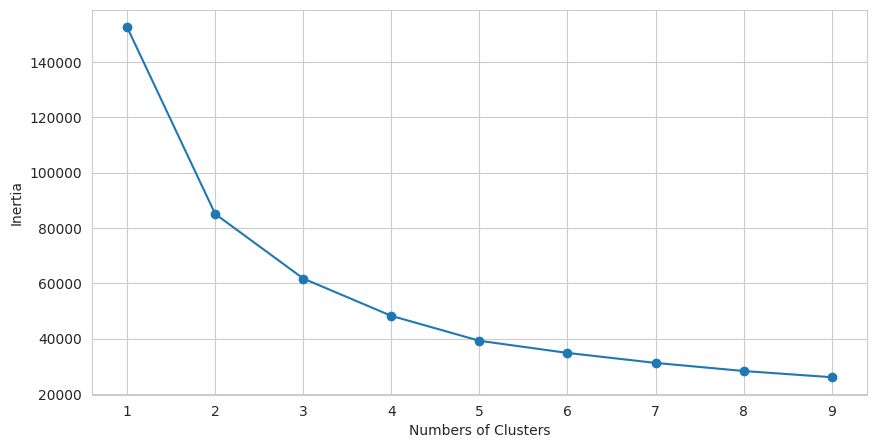

In [96]:
optimise(train_df[['Region_Code_S', 'Mean_Age_S', 'Reco_Policy_Premium_log_S']], 10)

In the plot above we can see the inertia decreases as we increase clusters. There is a large change in inertia from 3 cluster moving forward.

In [97]:
#setting up kmeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(train_df[['Region_Code_S', 'Mean_Age_S', 'Reco_Policy_Premium_log_S']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [100]:
train_df['Kmeans_cluster3'] = kmeans.labels_

Using KMeans with `k = 3` on the relationship between the numerical features `Mean_Age` and `Region_Code`.

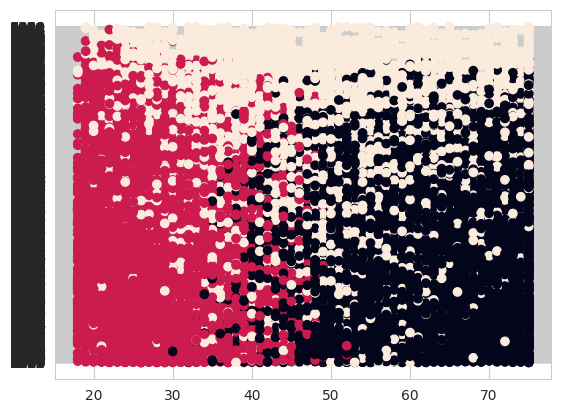

In [102]:
plt.scatter(x=train_df['Mean_Age'], y = train_df['Region_Code'], c =train_df['Kmeans_cluster3'])
plt.show()

In the relationship between `Mean_Age` and `Region_Code` show a poor evaluation of 3 groupings. The plot had two distinct areas with red coloring showing the first group and purple coloring showing the second group; however, the third group mixed in tells us it was difficult to group and find a relationship between these two variables.  

Using KMeans with `k = 3` on the relationship between the numerical features `Reco_Policy_Premium_log` and `Region_Code`.

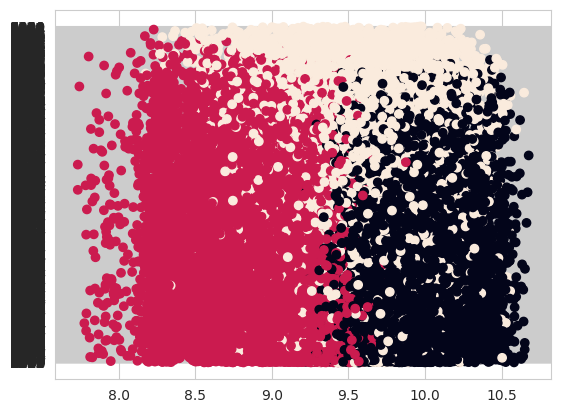

In [103]:
plt.scatter(x=train_df['Reco_Policy_Premium_log'], y = train_df['Region_Code'], c =train_df['Kmeans_cluster3'])

In the relationship between `Reco_Policy_Premium_log` and `Region_Code` show a poor evaluation of 3 groupings. The plot had two distinct areas with red coloring showing the first group and purple coloring showing the second group; however, the third group mixed in tells us it was difficult to group and find a relationship between these two variables.  

Using KMeans with `k = 3` on the relationship between the numerical features `Reco_Policy_Premium_log` and `Mean_Age`.

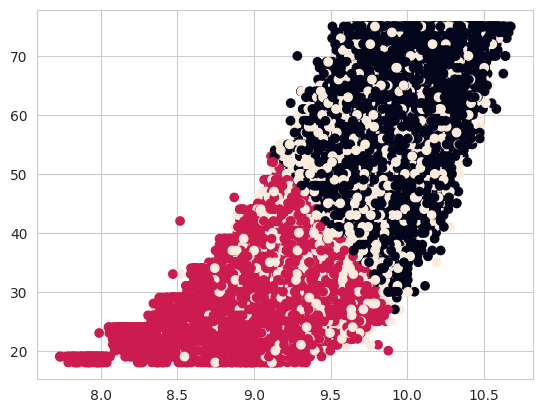

In [110]:
plt.scatter(x=train_df['Reco_Policy_Premium_log'], y = train_df['Mean_Age'], c =train_df['Kmeans_cluster3'])
plt.show()

In the relationship between `Reco_Policy_Premium_log` and `Region_Code` shows 3 distinct groups with low policy premium pricing with lower age. Then, an exponential increase in the policy premium pricing with higher age.

Overall, these k-means clustering visualizations gives us valuable insight into the relationships between these variables, and groupings for classifications. This will help us identify the type of customers is interested in our proposed health policy.